In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
1201 + 326 + 685 + 328 + 1195 + 2225

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
from model_equations_separate_NC_sep_vmax import *

In [5]:
import run_sensitivity

In [6]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [7]:
gorder = [ 'Sustained', 'Strong', 'Inhibited',]
gpalette = sns.color_palette('Accent', n_colors=3).as_hex()
gpalette

['#7fc97f', '#beaed4', '#fdc086']

In [8]:
morder = ['MIN', 'LEAK', 'MIXO']

In [9]:
morder = ['MIN', 'LEAK', 'MIXO']
mpalette = sns.color_palette(palette='gist_stern', n_colors=3)
mpalette

In [10]:
rmse_threshold = 20

In [11]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [12]:
#dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
#dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

In [13]:
import os
os.listdir(dpath)

['het_monte_LEAK_sum.csv.gz',
 'het_monte_MIN_df.csv.gz',
 'het_monte_LEAK_df.csv.gz',
 'het_monte_mse.csv.gz',
 'het_monte_MIN_mse.csv.gz',
 'vhet_mse.csv.gz',
 'lsq_strong_mse.csv.gz',
 'het_lsq_MIN_sum.csv.gz',
 'het_lsq_MIN_df.csv.gz',
 'PONLY',
 'lsq_strong_sustained_df.csv.gz',
 'lsq_strong_sum.csv.gz',
 'lsq_strong_df.csv.gz',
 'lsq_strong_sustained_mse.csv.gz',
 'het_monte_MIN_sum.csv.gz',
 'het_lsq_MIN_mse.csv.gz',
 'vhet_MIN_mse.csv.gz',
 'toremove',
 'vhet_MIN_df.csv.gz',
 'lsq_strong_sustained_sum.csv.gz',
 'vhet_sum.csv.gz',
 'vhet_MIN_sum.csv.gz',
 'het_monte_df.csv.gz',
 'vhet_df.csv.gz',
 'het_monte_sum.csv.gz',
 'het_monte_LEAK_mse.csv.gz']

In [14]:
lsq_df =  pd.read_csv(os.path.join(dpath,'lsq_strong_sustained_df.csv.gz' ))
lsqsum_df = pd.read_csv(os.path.join(dpath,'lsq_strong_sustained_sum.csv.gz' ))
lsqmse_df = pd.read_csv(os.path.join(dpath,'lsq_strong_sustained_mse.csv.gz' ))

In [15]:
monte1_df =  pd.read_csv(os.path.join(dpath,'het_monte_df.csv.gz' ))
monte1sum_df = pd.read_csv(os.path.join(dpath,'het_monte_sum.csv.gz' ))
monte1mse_df = pd.read_csv(os.path.join(dpath,'het_monte_mse.csv.gz' ))

In [16]:
vhet1_df =  pd.read_csv(os.path.join(dpath,'vhet_df.csv.gz' ))
vhet1sum_df = pd.read_csv(os.path.join(dpath,'vhet_sum.csv.gz' ))
vhet1mse_df = pd.read_csv(os.path.join(dpath,'vhet_mse.csv.gz' ))

In [17]:
monte1mse_df.run_id.unique()

array(['het_monte_LEAK_least_square_LEAK_0.01_841_h41740546101949368',
       'het_monte_LEAK_least_square_LEAK_0.01_376_h-3744324552018451942',
       'het_monte_LEAK_least_square_LEAK_0.01_556_h-8244342590826792512',
       ...,
       'het_monte_MIXO_least_square_MIXO_20_963_h2704790288506760930',
       'het_monte_MIXO_least_square_MIXO_20_892_h7696489876806693668',
       'het_monte_MIXO_least_square_MIXO_20_735_h-9035754185738008266'],
      dtype=object)

In [18]:
lsqsum_df.run_id.unique()

array(['het_least_square_MIN_least_square_MIN_0.01_5_1_h-4778139368656589578',
       'het_least_square_MIN_least_square_MIN_0.01_5_1_h7574824186036369943',
       'het_least_square_MIN_least_square_MIN_0.01_5_1_h-4907018662048764401',
       ...,
       'het_least_square_LEAK_least_square_LEAK_1_2_1_h4448921564895853518',
       'het_least_square_LEAK_least_square_LEAK_1_2_1_h-2621541311730279561',
       'het_least_square_LEAK_least_square_LEAK_1_2_1_h-46734221568027702'],
      dtype=object)

In [19]:
vhet1mse_df['optimized_for'] = vhet1mse_df.run_id.str.extract(r'_(\d+)_1$')
lsqmse_df['optimized_for'] = lsqmse_df.run_id.str.extract(r'_(\d+)_1_h$')



In [20]:
optimized_for_map = {
    '2': 'Sustained',
    '3': 'Inhibited','4': 'Inhibited',
    '5': 'Sustained','6': 'Strong','7': 'Strong',
    '8': 'Inhibited', '9': 'Inhibited','10': 'Inhibited','11': 'Inhibited'
}

In [21]:
vhet1mse_df['optimized_for_group'] = vhet1mse_df.optimized_for.map(optimized_for_map)
lsqmse_df['optimized_for'] = lsqmse_df.optimized_for.map(optimized_for_map)



In [22]:
monte1_df['Model'] = monte1_df.run_id.str.extract(r'het_monte_([A-Z]+)_')
monte1sum_df['Model']  = monte1sum_df.run_id.str.extract(r'het_monte_([A-Z]+)_')
monte1mse_df['Model'] = monte1mse_df.run_id.str.extract(r'het_monte_([A-Z]+)_')

vhet1_df['Model'] =  vhet1_df.run_id.str.extract(r'vhet_het_least_square_([A-Z]+)_least')
vhet1mse_df['Model'] = vhet1mse_df.run_id.str.extract(r'vhet_het_least_square_([A-Z]+)_least')
vhet1sum_df['Model'] = vhet1sum_df.run_id.str.extract(r'vhet_het_least_square_([A-Z]+)_least')

lsq_df['Model'] =  lsq_df.run_id.str.extract(r'het_least_square_([A-Z]+)_least')
lsqmse_df['Model'] = lsqmse_df.run_id.str.extract(r'het_least_square_([A-Z]+)_least')
lsqsum_df['Model'] = lsqsum_df.run_id.str.extract(r'het_least_square_([A-Z]+)_least')

In [23]:
monte1_df['VPRO'] = monte1_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
monte1sum_df['VPRO']  = monte1sum_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
monte1mse_df['VPRO'] = monte1mse_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')

vhet1_df['VPRO'] =  vhet1_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
vhet1mse_df['VPRO'] = vhet1mse_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
vhet1sum_df['VPRO'] = vhet1sum_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')

lsq_df['VPRO'] =  lsq_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
lsqmse_df['VPRO'] = lsqmse_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')
lsqsum_df['VPRO'] = lsqsum_df.run_id.str.extract(r'least_square_([A-Z]+_[0-9\.]+)_')

In [24]:
monte1_df['Mode'] =  'Monte'
monte1mse_df['Mode'] =  'Monte'
vhet1_df['Mode'] =  'VHET'
vhet1mse_df['Mode'] =  'VHET'
lsq_df['Mode'] =  'LSQ'
lsqmse_df['Mode'] =  'LSQ'

In [25]:
monte1sum_df.shape, vhet1sum_df.shape, lsqsum_df.shape

In [26]:
df = pd.concat([monte1_df, vhet1_df, lsq_df
               ], ignore_index=True)
mse_df = pd.concat([monte1mse_df, vhet1mse_df, lsqmse_df
                   ], ignore_index=True)


In [27]:
mse_df['model/mode'] = mse_df['Model']+ ' / '+mse_df['Mode']
df['model/mode']     = df['Model']+ ' / '+df['Mode']


In [28]:
mdf = df.melt(id_vars=['Mode','Model', 'VPRO', 'model/mode', 'run_id', 'day', 't'], value_vars=['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',])

In [29]:
neg_ids = set(mdf.loc[mdf.value<-1e-6, 'run_id'])
#neg_ids
#df = df.loc[~df.run_id.isin(neg_ids)]
#sum_df = sum_df.loc[~sum_df.run_id.isin(neg_ids)]


In [30]:
problematic_mse_ids = set(mse_df.loc[mse_df.compare_points < 74, 'run_id'])

In [31]:
problematic_ids = problematic_mse_ids | neg_ids

In [32]:
len(problematic_ids)

In [33]:
problematic_ids

{'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-1634490735601628386',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-3115546639491048941',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-3666882410859878342',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h-4887656627708370830',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h1518772512242548527',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h3472576574107715014',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h5265406323482317194',
 'het_least_square_LEAK_least_square_LEAK_0.01_6_1_h7675690716741697744',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-1142201482516018065',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-2259166767266721742',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-2620894792244359402',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-2862815746917094123',
 'het_least_square_LEAK_least_square_LEAK_0.1_6_1_h-3378310696365426824',
 'het_least_square_LEAK_least_squa

In [34]:
mdf = mdf.loc[~mdf.run_id.isin(problematic_ids)]
df = df.loc[~df.run_id.isin(problematic_ids)]
mse_df = mse_df.loc[~mse_df.run_id.isin(problematic_ids)]


In [35]:
mse_df.compare_points.value_counts()

74.0    1986780
Name: compare_points, dtype: int64

In [36]:
mse_df = mse_df.loc[~mse_df.Group.isin(['Axenic'])]

In [37]:
mse_df.Group.unique()
mse_df.loc[mse_df.Group.isin(['Inhibited Viable']), 'Group'] ='Inhibited'

In [38]:
mse_df['RMSE'] = np.sqrt(mse_df['MSE'])

In [39]:
#rmse_threshold = 10
mse_df['Group_thrs'] = mse_df['Group']
mse_df.loc[mse_df.RMSE > rmse_threshold, 'Group_thrs'] = 'None'


In [40]:
min_mse_df = mse_df.loc[mse_df.groupby('run_id').MSE.idxmin()].reset_index(drop=True)

In [41]:
min_mse_df

Sample                       full name      Group  compare_points  \
0        4C0       Phaeobacter gallaeciensis  Inhibited            74.0   
1       10B0                   Marinovum 5F3  Inhibited            74.0   
2        4C0       Phaeobacter gallaeciensis  Inhibited            74.0   
3        4C0       Phaeobacter gallaeciensis  Inhibited            74.0   
4       10B0                   Marinovum 5F3  Inhibited            74.0   
...      ...                             ...        ...             ...   
66221    7C0  Sulfitobacter pseudonitzschiae     Strong            74.0   
66222   10C0                   Marinovum 5F3  Inhibited            74.0   
66223   10C0                   Marinovum 5F3  Inhibited            74.0   
66224   10C0                   Marinovum 5F3  Inhibited            74.0   
66225   10C0                   Marinovum 5F3  Inhibited            74.0   

             MSE                                             run_id Model  \
0       3.068031  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
1       4.023713  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
2       3.068031  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
3       2.928330  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
4       4.023713  het_least_square_LEAK_least_square_LEAK_0.01_2...  LEAK   
...          ...                                                ...   ...   
66221  15.902896  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO   
66222  43.638271  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   
66223  24.745346  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   
66224  26.003565  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   
66225  24.992259  vhet_het_least_square_MIXO_least_square_MIXO_2...  MIXO   

            VPRO  Mode optimized_for optimized_for_group   model/mode  \
0      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
1      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
2      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
3      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
4      LEAK_0.01   LSQ           NaN                 NaN   LEAK / LSQ   
...          ...   ...           ...                 ...          ...   
66221     MIXO_1  VHET             7              Strong  MIXO / VHET   
66222    MIXO_20  VHET             2           Sustained  MIXO / VHET   
66223    MIXO_20  VHET             5           Sustained  MIXO / VHET   
66224    MIXO_20  VHET             6              Strong  MIXO / VHET   
66225    MIXO_20  VHET             7              Strong  MIXO / VHET   

           RMSE Group_thrs  
0      1.751579  Inhibited  
1      2.005920  Inhibited  
2      1.751579  Inhibited  
3      1.711237  Inhibited  
4      2.005920  Inhibited  
...         ...        ...  
66221  3.987844     Strong  
66222  6.605927  Inhibited  
66223  4.974469  Inhibited  
66224  5.099369  Inhibited  
66225  4.999226  Inhibited  

[66226 rows x 14 columns]

In [42]:
min_mse_df.Group.value_counts()

Inhibited    31885
Sustained    22922
Strong       11419
Name: Group, dtype: int64

In [43]:
min_mse_df.Group_thrs.value_counts()

Inhibited    31882
Sustained    22394
Strong       11418
None           532
Name: Group_thrs, dtype: int64

In [44]:
min_mse_df['Mode'].value_counts()

LSQ      49963
Monte    16184
VHET        79
Name: Mode, dtype: int64

In [45]:
min_mse_df['model/mode'].value_counts()

MIN / LSQ       36024
MIXO / LSQ       8552
MIN / Monte      6007
LEAK / LSQ       5387
MIXO / Monte     5119
LEAK / Monte     5058
MIN / VHET         41
LEAK / VHET        20
MIXO / VHET        18
Name: model/mode, dtype: int64

In [46]:
strong_sustained_run_ids = min_mse_df.loc[min_mse_df.Group_thrs.isin(['Strong', 'Sustained']), 'run_id']
strong_sustained_run_ids

50       het_least_square_LEAK_least_square_LEAK_0.01_5...
51       het_least_square_LEAK_least_square_LEAK_0.01_5...
52       het_least_square_LEAK_least_square_LEAK_0.01_5...
53       het_least_square_LEAK_least_square_LEAK_0.01_5...
55       het_least_square_LEAK_least_square_LEAK_0.01_5...
                               ...                        
66216    vhet_het_least_square_MIXO_least_square_MIXO_1...
66217    vhet_het_least_square_MIXO_least_square_MIXO_1...
66219    vhet_het_least_square_MIXO_least_square_MIXO_1...
66220    vhet_het_least_square_MIXO_least_square_MIXO_1...
66221    vhet_het_least_square_MIXO_least_square_MIXO_1...
Name: run_id, Length: 33812, dtype: object

In [47]:
min_mse_df = min_mse_df.loc[min_mse_df.run_id.isin(strong_sustained_run_ids)]
mse_df = mse_df.loc[mse_df.run_id.isin(strong_sustained_run_ids)]
mdf = mdf.loc[mdf.run_id.isin(strong_sustained_run_ids)]
df = df.loc[df.run_id.isin(strong_sustained_run_ids)]


In [49]:
min_mse_df.head()

Sample                       full name      Group  compare_points  \
50    5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
51    5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
52    5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
53    5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
55    5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   

          MSE                                             run_id Model  \
50  53.519745  het_least_square_LEAK_least_square_LEAK_0.01_5...  LEAK   
51  53.541749  het_least_square_LEAK_least_square_LEAK_0.01_5...  LEAK   
52  53.449896  het_least_square_LEAK_least_square_LEAK_0.01_5...  LEAK   
53  53.613380  het_least_square_LEAK_least_square_LEAK_0.01_5...  LEAK   
55  53.442809  het_least_square_LEAK_least_square_LEAK_0.01_5...  LEAK   

         VPRO Mode optimized_for optimized_for_group  model/mode      RMSE  \
50  LEAK_0.01  LSQ           NaN                 NaN  LEAK / LSQ  7.315719   
51  LEAK_0.01  LSQ           NaN                 NaN  LEAK / LSQ  7.317223   
52  LEAK_0.01  LSQ           NaN                 NaN  LEAK / LSQ  7.310944   
53  LEAK_0.01  LSQ           NaN                 NaN  LEAK / LSQ  7.322116   
55  LEAK_0.01  LSQ           NaN                 NaN  LEAK / LSQ  7.310459   

   Group_thrs  
50  Sustained  
51  Sustained  
52  Sustained  
53  Sustained  
55  Sustained

In [50]:
min_mse_df[['Sample','full name']].value_counts().reset_index().sort_values('Sample')

Sample                       full name      0
2    2C0                A. macleodii 1A3   1817
0    5A0  Pseudoalteromonas haloplanktis  20577
4    6A0               Ruegeria pomeroyi   1180
6    6B0               Ruegeria pomeroyi     50
5    7A0  Sulfitobacter pseudonitzschiae    301
1    7B0  Sulfitobacter pseudonitzschiae   8512
3    7C0  Sulfitobacter pseudonitzschiae   1375

In [51]:
min_mse_df.Group.unique()

array(['Sustained', 'Strong'], dtype=object)

In [52]:
vhet_tmp_df = min_mse_df.loc[min_mse_df.Mode.isin(['VHET']) & min_mse_df.optimized_for_group.isin(['Strong', 'Sustained'])]
vhet_tmp_df = pd.merge(vhet_tmp_df, vhet1_df, on=['run_id', 'Model', 'Mode', 'VPRO'], how='left')

In [53]:
vhet_tmp_df

Sample                       full name      Group  compare_points  \
0       5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
1       5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
2       5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
3       5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
4       5A0  Pseudoalteromonas haloplanktis  Sustained            74.0   
...     ...                             ...        ...             ...   
2141    7C0  Sulfitobacter pseudonitzschiae     Strong            74.0   
2142    7C0  Sulfitobacter pseudonitzschiae     Strong            74.0   
2143    7C0  Sulfitobacter pseudonitzschiae     Strong            74.0   
2144    7C0  Sulfitobacter pseudonitzschiae     Strong            74.0   
2145    7C0  Sulfitobacter pseudonitzschiae     Strong            74.0   

            MSE                                             run_id Model  \
0     53.453059  vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK   
1     53.453059  vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK   
2     53.453059  vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK   
3     53.453059  vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK   
4     53.453059  vhet_het_least_square_LEAK_least_square_LEAK_0...  LEAK   
...         ...                                                ...   ...   
2141  15.902896  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO   
2142  15.902896  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO   
2143  15.902896  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO   
2144  15.902896  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO   
2145  15.902896  vhet_het_least_square_MIXO_least_square_MIXO_1...  MIXO   

           VPRO  Mode optimized_for  ...          DIC       ROS  ABp  ABh  \
0     LEAK_0.01  VHET             5  ...  2241.552301  0.200000  0.0  0.0   
1     LEAK_0.01  VHET             5  ...  2255.376790  0.197848  0.0  0.0   
2     LEAK_0.01  VHET             5  ...  2243.648314  0.195717  0.0  0.0   
3     LEAK_0.01  VHET             5  ...  2219.436869  0.194580  0.0  0.0   
4     LEAK_0.01  VHET             5  ...  2142.173769  0.192631  0.0  0.0   
...         ...   ...           ...  ...          ...       ...  ...  ...   
2141     MIXO_1  VHET             7  ...  2239.071295  0.065949  0.0  0.0   
2142     MIXO_1  VHET             7  ...  2240.070044  0.062794  0.0  0.0   
2143     MIXO_1  VHET             7  ...  2240.464441  0.060973  0.0  0.0   
2144     MIXO_1  VHET             7  ...  2240.757777  0.059177  0.0  0.0   
2145     MIXO_1  VHET             7  ...  2241.171308  0.055182  0.0  0.0   

               t         day       Bp[C]         Bh[C]  ABp[C]  ABh[C]  
0            0.0    0.000000   12.500000  6.428571e+01     0.0     0.0  
1        93480.0    1.081944   27.811478  1.590194e+02     0.0     0.0  
2       187020.0    2.164583   61.910067  1.282432e+02     0.0     0.0  
3       237360.0    2.747222   95.234241  1.163010e+02     0.0     0.0  
4       324360.0    3.754167  137.145692  1.518815e+02     0.0     0.0  
...          ...         ...         ...           ...     ...     ...  
2141   9585540.0  110.943750    0.000343  4.678423e-16     0.0     0.0  
2142  10009080.0  115.845833    0.000124  2.116929e-17     0.0     0.0  
2143  10263360.0  118.788889    0.000067  3.300467e-18     0.0     0.0  
2144  10521600.0  121.777778    0.000036  4.998902e-19     0.0     0.0  
2145  11125500.0  128.767361    0.000008  6.053214e-21     0.0     0.0  

[2146 rows x 31 columns]

/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


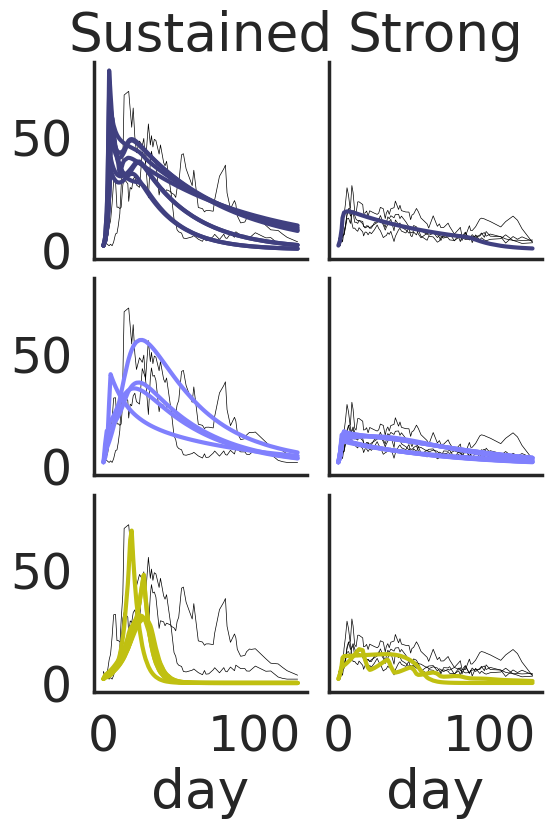

In [56]:
#base_df['model_'] = base_df['model_']
sns.set_context('poster', font_scale=1.6)
g = sns.relplot(
    data=vhet_tmp_df,
    x='day', y='Bp', row='Model', row_order=morder,
    col='optimized_for_group',
    estimator=None, units='run_id', kind='line',
    hue= 'Model', hue_order=morder, 
    palette=mpalette, legend=False, 
    aspect=1.2, height=3,
    facet_kws=dict(margin_titles=True)
)
for (i,j), ax in g.axes_dict.items():
    sns.lineplot(
            data=refdf.loc[refdf.Group.isin([j]) & refdf.Sample.isin(vhet_tmp_df.Sample)],
        x='day', y='ref_Bp', lw=0.5, zorder =1,
        estimator=None, units='Sample',
        color='black', ax=ax
    )
#g.set_titles(col_template='{col_name}',)
g.set_titles(row_template='',col_template='{col_name}',)
g.set(ylabel='umol N/L')
g.set(ylabel='')
#g.set(ylim=(0,110))
#g.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)

In [57]:
import hdbscan


In [58]:
import umap

In [61]:
sample_cols_umap = ['Bp', 'Bh', 'DON', 'DIN', 'DOC', ]
sample_cols_HDBSCAN = ['Bp', 'Bh',]

#sample_days = [ 5, 12, 16, 19, 40, 65]
sample_days = [ 5, 9, 12, 17, 25, 42, 60, 91]




In [73]:
runids = min_mse_df.loc[
    min_mse_df.Mode.isin(['Monte', 'VHET']) ,'run_id']


In [74]:
tdf = mdf.loc[#mdf.day.round(0).isin(sample_days) &
    mdf.run_id.isin(runids) &
               mdf.variable.isin(sample_cols_umap) 
              #& mdf.run_id.isin(sum_df.run_id)
              #& mdf.run_id.isin(pos_run_ids2)
              #& ~mdf.run_id.isin(neg_ids)
             ]
#tdf['day0'] = tdf.day.round(0)
Xu = tdf.pivot(index='run_id', columns=['variable', 'day'], values=['value'])

In [75]:
Xu

value             \
variable                                                   Bp              
day                                                0.000000   1.081944     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...   1.785714   3.973065   
het_monte_LEAK_least_square_LEAK_0.01_1006_h908...   1.785714   3.973065   
het_monte_LEAK_least_square_LEAK_0.01_1019_h182...   1.785714   3.973065   
het_monte_LEAK_least_square_LEAK_0.01_112_h1068...   1.785714   3.973065   
het_monte_LEAK_least_square_LEAK_0.01_117_h2668...   1.785714   3.973065   
...                                                       ...        ...   
vhet_het_least_square_MIXO_least_square_MIXO_10...   1.785714   2.489830   
vhet_het_least_square_MIXO_least_square_MIXO_10...   1.785714   2.747312   
vhet_het_least_square_MIXO_least_square_MIXO_1_2_1   1.785714   3.373551   
vhet_het_least_square_MIXO_least_square_MIXO_1_5_1   1.785714   3.419073   
vhet_het_least_square_MIXO_least_square_MIXO_1_7_1   1.785714   4.011719   

                                                                          \
variable                                                                   
day                                                2.164583   2.747222     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...   8.844279  13.604862   
het_monte_LEAK_least_square_LEAK_0.01_1006_h908...   8.844278  13.604858   
het_monte_LEAK_least_square_LEAK_0.01_1019_h182...   8.844278  13.604859   
het_monte_LEAK_least_square_LEAK_0.01_112_h1068...   8.844279  13.604861   
het_monte_LEAK_least_square_LEAK_0.01_117_h2668...   8.844278  13.604860   
...                                                       ...        ...   
vhet_het_least_square_MIXO_least_square_MIXO_10...   2.879545   3.111154   
vhet_het_least_square_MIXO_least_square_MIXO_10...   3.099461   3.307872   
vhet_het_least_square_MIXO_least_square_MIXO_1_2_1   3.869146   4.152962   
vhet_het_least_square_MIXO_least_square_MIXO_1_5_1   4.015355   4.360795   
vhet_het_least_square_MIXO_least_square_MIXO_1_7_1   7.826403  11.188541   

                                                                          \
variable                                                                   
day                                                3.754167   4.701389     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...  28.637042  32.011061   
het_monte_LEAK_least_square_LEAK_0.01_1006_h908...  28.637025  57.674254   
het_monte_LEAK_least_square_LEAK_0.01_1019_h182...  28.637028  57.674262   
het_monte_LEAK_least_square_LEAK_0.01_112_h1068...  28.637023  52.002288   
het_monte_LEAK_least_square_LEAK_0.01_117_h2668...  27.720788  28.005975   
...                                                       ...        ...   
vhet_het_least_square_MIXO_least_square_MIXO_10...   3.548555   4.003354   
vhet_het_least_square_MIXO_least_square_MIXO_10...   3.702928   4.119186   
vhet_het_least_square_MIXO_least_square_MIXO_1_2_1   4.671035   5.190398   
vhet_het_least_square_MIXO_least_square_MIXO_1_5_1   4.997352   5.642217   
vhet_het_least_square_MIXO_least_square_MIXO_1_7_1  11.923521  11.949091   

                                                                          \
variable                                                                   
day                                                5.720139   6.731944     
run_id                                                                     
het_monte_LEAK_least_square_LEAK_0.01_1001_h-40...  31.609443  31.507367   
het_monte_LEAK_least_square_LEAK_0.01_1006_h908...  64.436509  65.426780   
het_monte_LEAK_least_square_LEAK_0.01_1019_h182...  61.562550  62.333423   
het_monte_LEAK_least_square_LEAK_0.01_112_h1068...  50.207872  49.353067   
het_monte_LEAK_least_squa

In [76]:
reducer = umap.UMAP(random_state=1234, verbose=True, min_dist=0)
umap_embedding = reducer.fit_transform(Xu)

UMAP(min_dist=0, random_state=1234, verbose=True)
Tue Jul 18 14:26:38 2023 Construct fuzzy simplicial set
Tue Jul 18 14:26:41 2023 Finding Nearest Neighbors
Tue Jul 18 14:26:44 2023 Finished Nearest Neighbor Search
Tue Jul 18 14:26:44 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Jul 18 14:26:49 2023 Finished embedding


In [77]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [78]:
#udf['run_id'] = Xufull.index
udf['run_id'] = Xu.index


In [79]:
udf = pd.merge(udf, min_mse_df, on='run_id', how='left')

In [80]:
sns.set_context('paper')

In [81]:
udf.columns

Index(['UMAP1', 'UMAP2', 'run_id', 'Sample', 'full name', 'Group',
       'compare_points', 'MSE', 'Model', 'VPRO', 'Mode', 'optimized_for',
       'optimized_for_group', 'model/mode', 'RMSE', 'Group_thrs'],
      dtype='object')

In [82]:
udf.shape

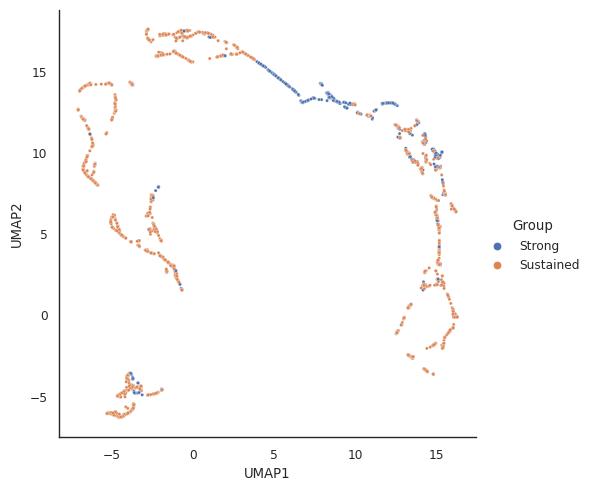

In [83]:
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='Group', s=5, #palette='fire'
)

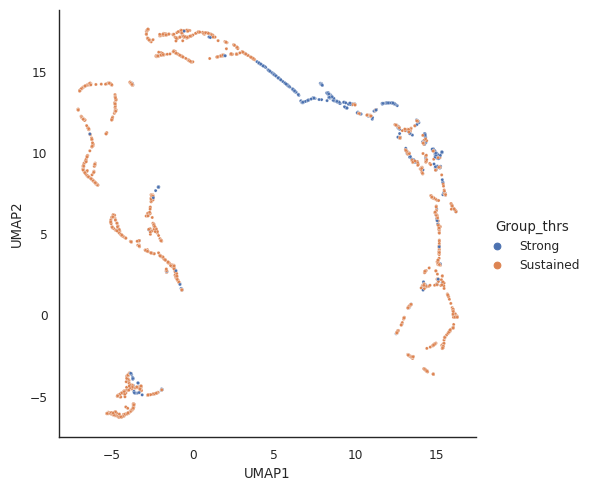

In [84]:
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='Group_thrs', s=5, #palette='fire'
)

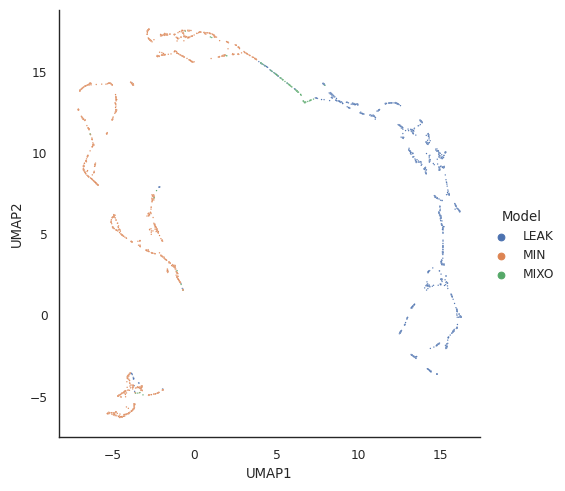

In [85]:
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='Model', s=1, #palette='fire'
)

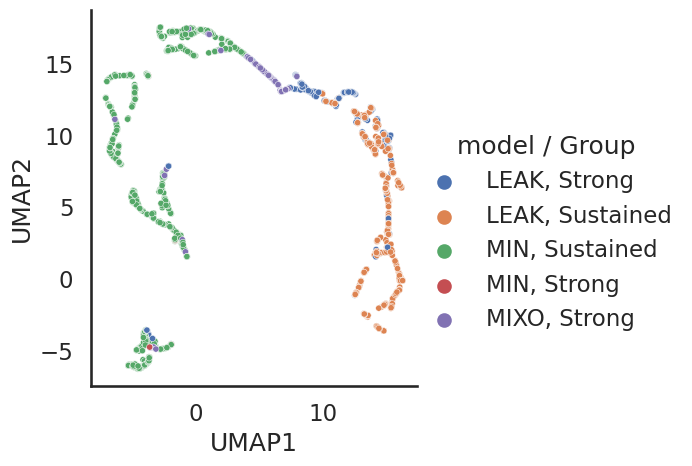

In [166]:
sns.set_context('talk')
udf['model / Group'] = udf['Model'] + ', ' + udf['Group']
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='model / Group', s=20, #palette='fire'
)

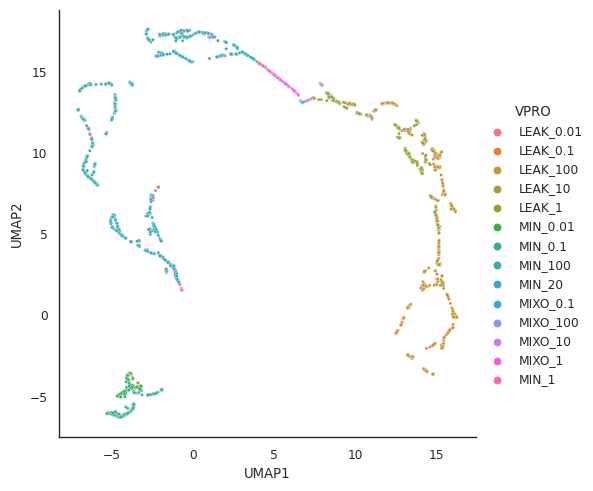

In [87]:
#udf['VPRO'] = udf['Model'] + ', ' + udf['Group']
sns.relplot(
    data=udf, 
    x='UMAP1',y='UMAP2',
    hue='VPRO', s=5, #palette='fire'
)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

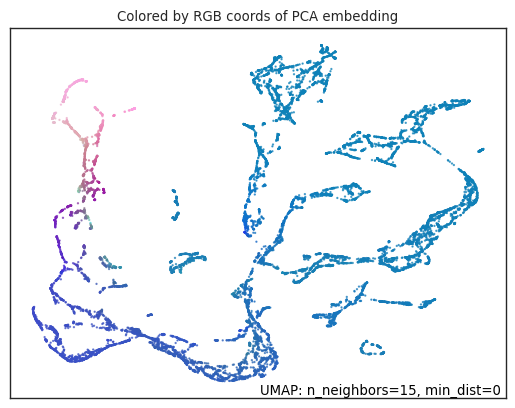

In [409]:
umap.plot.diagnostic(reducer, diagnostic_type='pca')

In [88]:
y = udf['Group_thrs'].map({'Inhibited' : 1, 'Strong' : 2, 'None' : -1, 'Sustained' : 3})
y.unique()

array([2, 3])

In [89]:
clusterable_reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=10,
    random_state=42,
    verbose=True,
)
    
clusterable_embedding = clusterable_reducer.fit_transform(Xu, y=y)

UMAP(min_dist=0.0, n_components=10, n_neighbors=30, random_state=42, verbose=True)
Tue Jul 18 14:27:36 2023 Construct fuzzy simplicial set
Tue Jul 18 14:27:39 2023 Finding Nearest Neighbors
Tue Jul 18 14:27:39 2023 Finished Nearest Neighbor Search
Tue Jul 18 14:27:39 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Jul 18 14:27:50 2023 Finished embedding


In [90]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=10, 
    #verbose=True,
    prediction_data=True,
    #core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 10.0,
    #cluster_selection_method='leaf'
)
labels = clusterer.fit_predict(clusterable_embedding)
# labels = hdbscan.HDBSCAN(
#     min_samples=10,
#     min_cluster_size=500,
# ).fit_predict(clusterable_embedding)

In [91]:
clusterer.labels_

array([0, 1, 1, ..., 0, 0, 0])

In [92]:
clusterer.labels_.max()

2

In [93]:
(clusterer.labels_ < 0).sum()

0

In [94]:
np.unique(clusterer.labels_, return_counts=True)

(array([0, 1, 2]), array([ 748,  653, 1041]))

In [95]:
udf.shape

In [96]:
udf['cluster'] = clusterer.labels_

In [97]:
udf.pivot_table(index='cluster', columns='Group_thrs', fill_value=0, aggfunc='count', values='Mode')

Group_thrs  Strong  Sustained
cluster                      
0              479        269
1               57        596
2                1       1040

In [98]:
sns.set_context('talk')

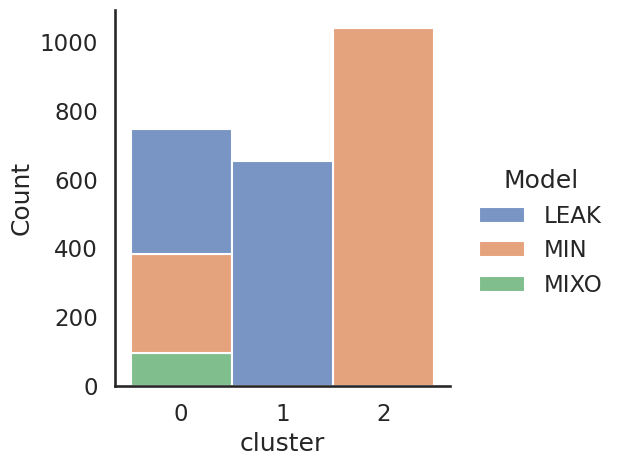

In [99]:
sns.displot(data=udf, x='cluster', hue='Model', discrete=True, multiple='stack')

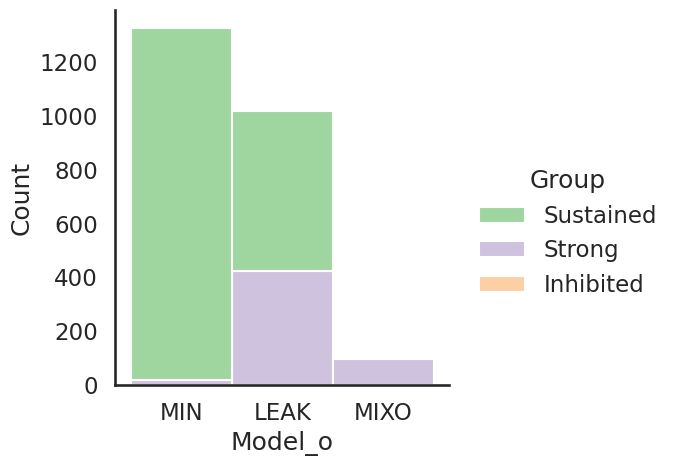

In [100]:
udf['Model_o'] = pd.Categorical(udf['Model'], categories=morder)
sns.displot(
    data=udf, hue='Group', x='Model_o',  discrete=True, multiple='stack',
    #order=morder,
    hue_order=gorder, palette=gpalette, #stat='frequency',
            
           )

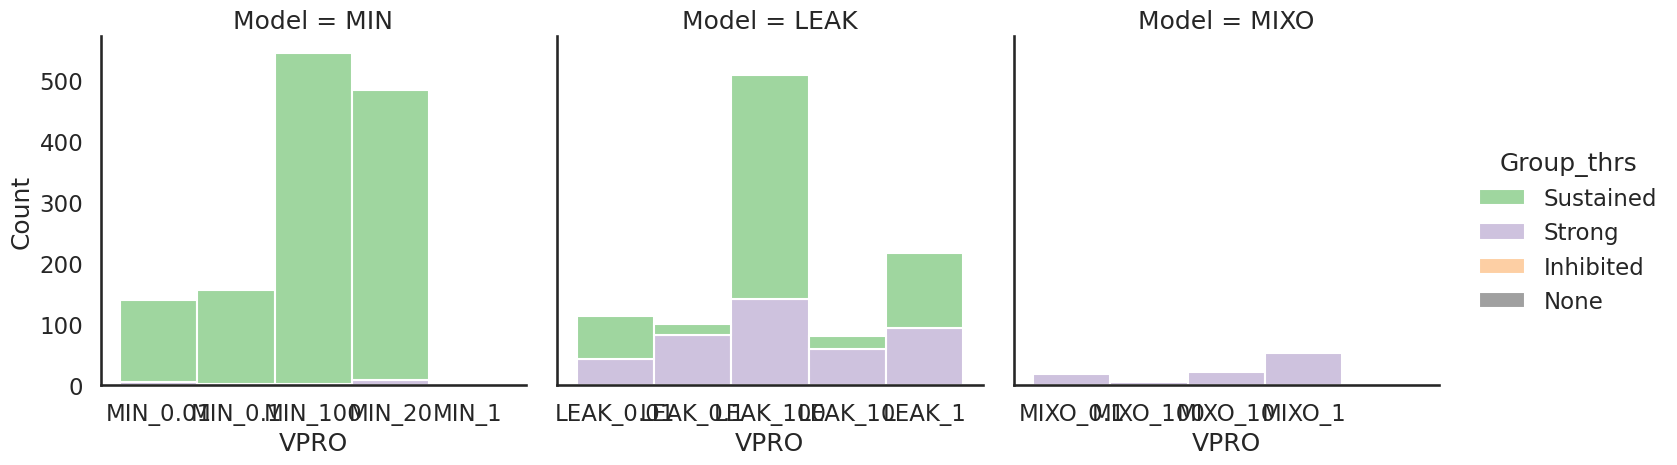

In [101]:
#udf['Model_o'] = pd.Categorical(udf['Model'], categories=morder)
sns.displot(
    data=udf, hue='Group_thrs', x='VPRO',  discrete=True, multiple='stack',
    col='Model',
    col_order=morder, facet_kws=dict(sharex=False),
    hue_order=gorder + ['None'], palette=gpalette + ['grey'], #stat='frequency',
            
           )

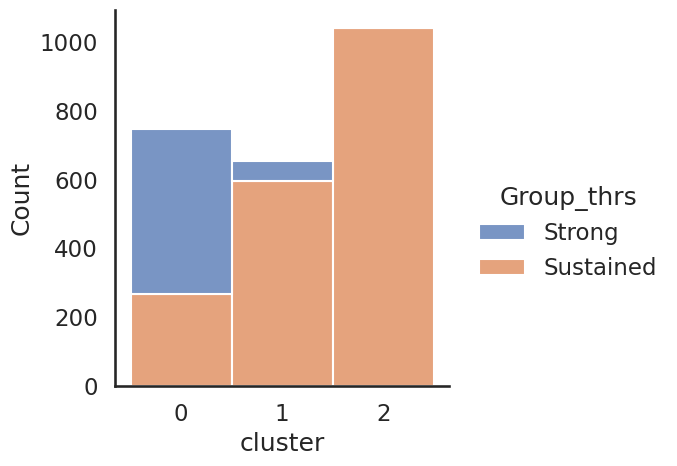

In [102]:
sns.displot(data=udf, x='cluster', hue='Group_thrs', discrete=True, multiple='stack')

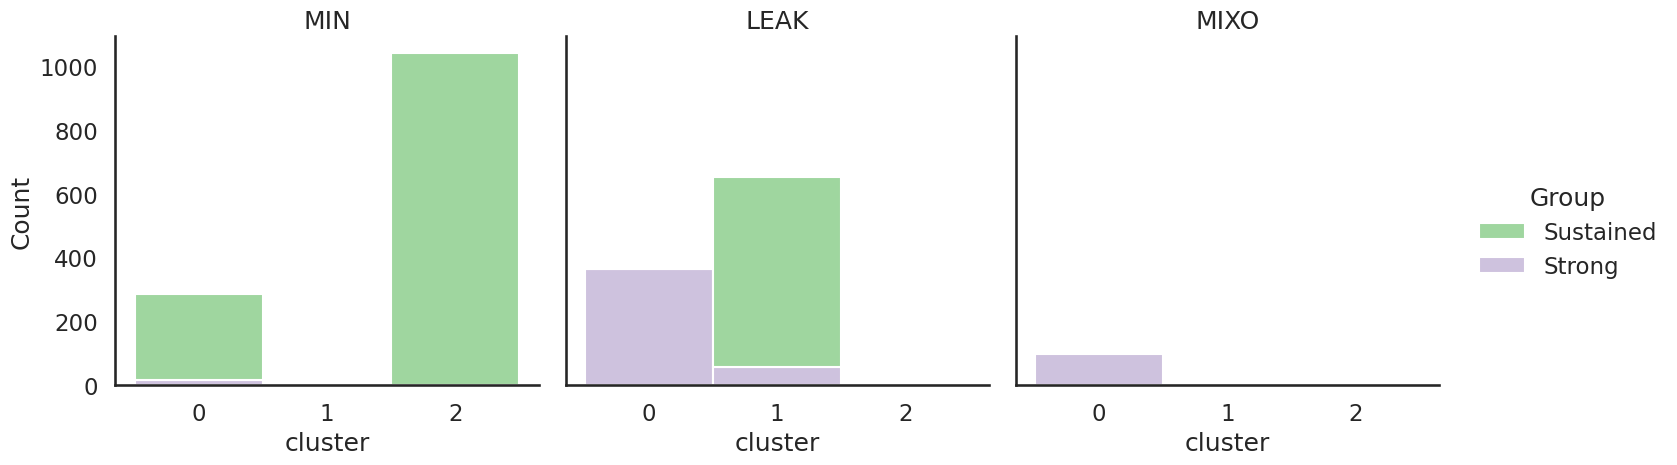

In [120]:
sns.displot(
    data=udf, x='cluster', hue='Group', discrete=True, multiple='stack', col='Model', col_order=morder,
    hue_order=gorder[:2], palette=gpalette[:2]
).set_titles(col_template='{col_name}')

In [138]:
examplars_df = udf.loc[udf.groupby(['exemplar', 'Group', 'Model']).RMSE.idxmin()]

tdf = mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(runids)]

examplars_df = pd.merge(tdf, examplars_df, on=['run_id', 'Model', 'Mode', 'model/mode', 'VPRO'], )
examplars_df

Mode Model       VPRO    model/mode  \
0     Monte  LEAK  LEAK_0.01  LEAK / Monte   
1     Monte  LEAK  LEAK_0.01  LEAK / Monte   
2     Monte  LEAK  LEAK_0.01  LEAK / Monte   
3     Monte  LEAK  LEAK_0.01  LEAK / Monte   
4     Monte  LEAK  LEAK_0.01  LEAK / Monte   
...     ...   ...        ...           ...   
2585   VHET   MIN     MIN_20    MIN / VHET   
2586   VHET   MIN     MIN_20    MIN / VHET   
2587   VHET   MIN     MIN_20    MIN / VHET   
2588   VHET   MIN     MIN_20    MIN / VHET   
2589   VHET   MIN     MIN_20    MIN / VHET   

                                                 run_id         day  \
0     het_monte_LEAK_least_square_LEAK_0.01_379_h-88...    0.000000   
1     het_monte_LEAK_least_square_LEAK_0.01_379_h-88...    1.081944   
2     het_monte_LEAK_least_square_LEAK_0.01_379_h-88...    2.164583   
3     het_monte_LEAK_least_square_LEAK_0.01_379_h-88...    2.747222   
4     het_monte_LEAK_least_square_LEAK_0.01_379_h-88...    3.754167   
...                                                 ...         ...   
2585  vhet_het_least_square_MIN_least_square_MIN_20_7_1  110.943750   
2586  vhet_het_least_square_MIN_least_square_MIN_20_7_1  115.845833   
2587  vhet_het_least_square_MIN_least_square_MIN_20_7_1  118.788889   
2588  vhet_het_least_square_MIN_least_square_MIN_20_7_1  121.777778   
2589  vhet_het_least_square_MIN_least_square_MIN_20_7_1  128.767361   

               t variable      value     UMAP1  ...  compare_points       MSE  \
0            0.0       Bp   1.785714  4.397991  ...            74.0  5.346191   
1        93480.0       Bp   3.973069  4.397991  ...            74.0  5.346191   
2       187020.0       Bp   8.844299  4.397991  ...            74.0  5.346191   
3       237360.0       Bp  10.856194  4.397991  ...            74.0  5.346191   
4       324360.0       Bp  10.820434  4.397991  ...            74.0  5.346191   
...          ...      ...        ...       ...  ...             ...       ...   
2585   9585540.0      DIN   0.000305 -3.627515  ...            74.0  9.405669   
2586  10009080.0      DIN   0.000305 -3.627515  ...            74.0  9.405669   
2587  10263360.0      DIN   0.000305 -3.627515  ...            74.0  9.405669   
2588  10521600.0      DIN   0.000305 -3.627515  ...            74.0  9.405669   
2589  11125500.0      DIN   0.000305 -3.627515  ...            74.0  9.405669   

     optimized_for optimized_for_group      RMSE  Group_thrs model / Group  \
0              NaN                 NaN  2.312183      Strong  LEAK, Strong   
1              NaN                 NaN  2.312183      Strong  LEAK, Strong   
2              NaN                 NaN  2.312183      Strong  LEAK, Strong   
3              NaN                 NaN  2.312183      Strong  LEAK, Strong   
4              NaN                 NaN  2.312183      Strong  LEAK, Strong   
...            ...                 ...       ...         ...           ...   
2585             7              Strong  3.066866      Strong   MIN, Strong   
2586             7              Strong  3.066866      Strong   MIN, Strong   
2587             7              Strong  3.066866      Strong   MIN, Strong   
2588             7              Strong  3.066866      Strong   MIN, Strong   
2589             7              Strong  3.066866      Strong   MIN, Strong   

     cluster  Model_o exemplar  
0          0     LEAK      0.0  
1          0     LEAK      0.0  
2          0     LEAK      0.0  
3          0     LEAK      0.0  
4          0     LEAK      0.0  
...      ...      ...      ...  
2585       0      MIN      0.0  
2586       0      MIN      0.0  
2587       0      MIN      0.0  
2588       0      MIN      0.0  
2589       0      MIN      0.0  

[2590 rows x 24 columns]

In [148]:
ccnorder1 = ccnorder[:3] + ccnorder[-2:]
ccnpalette1 = ccnpalette[:3] + ccnpalette[-2:]

ccnorder1

['DON', 'RDON', 'DIN', 'Bp', 'Bh']

In [161]:
idsorder = ['0: MIN', '0: LEAK', '0: MIXO', '1: LEAK', '2: MIN',  ]

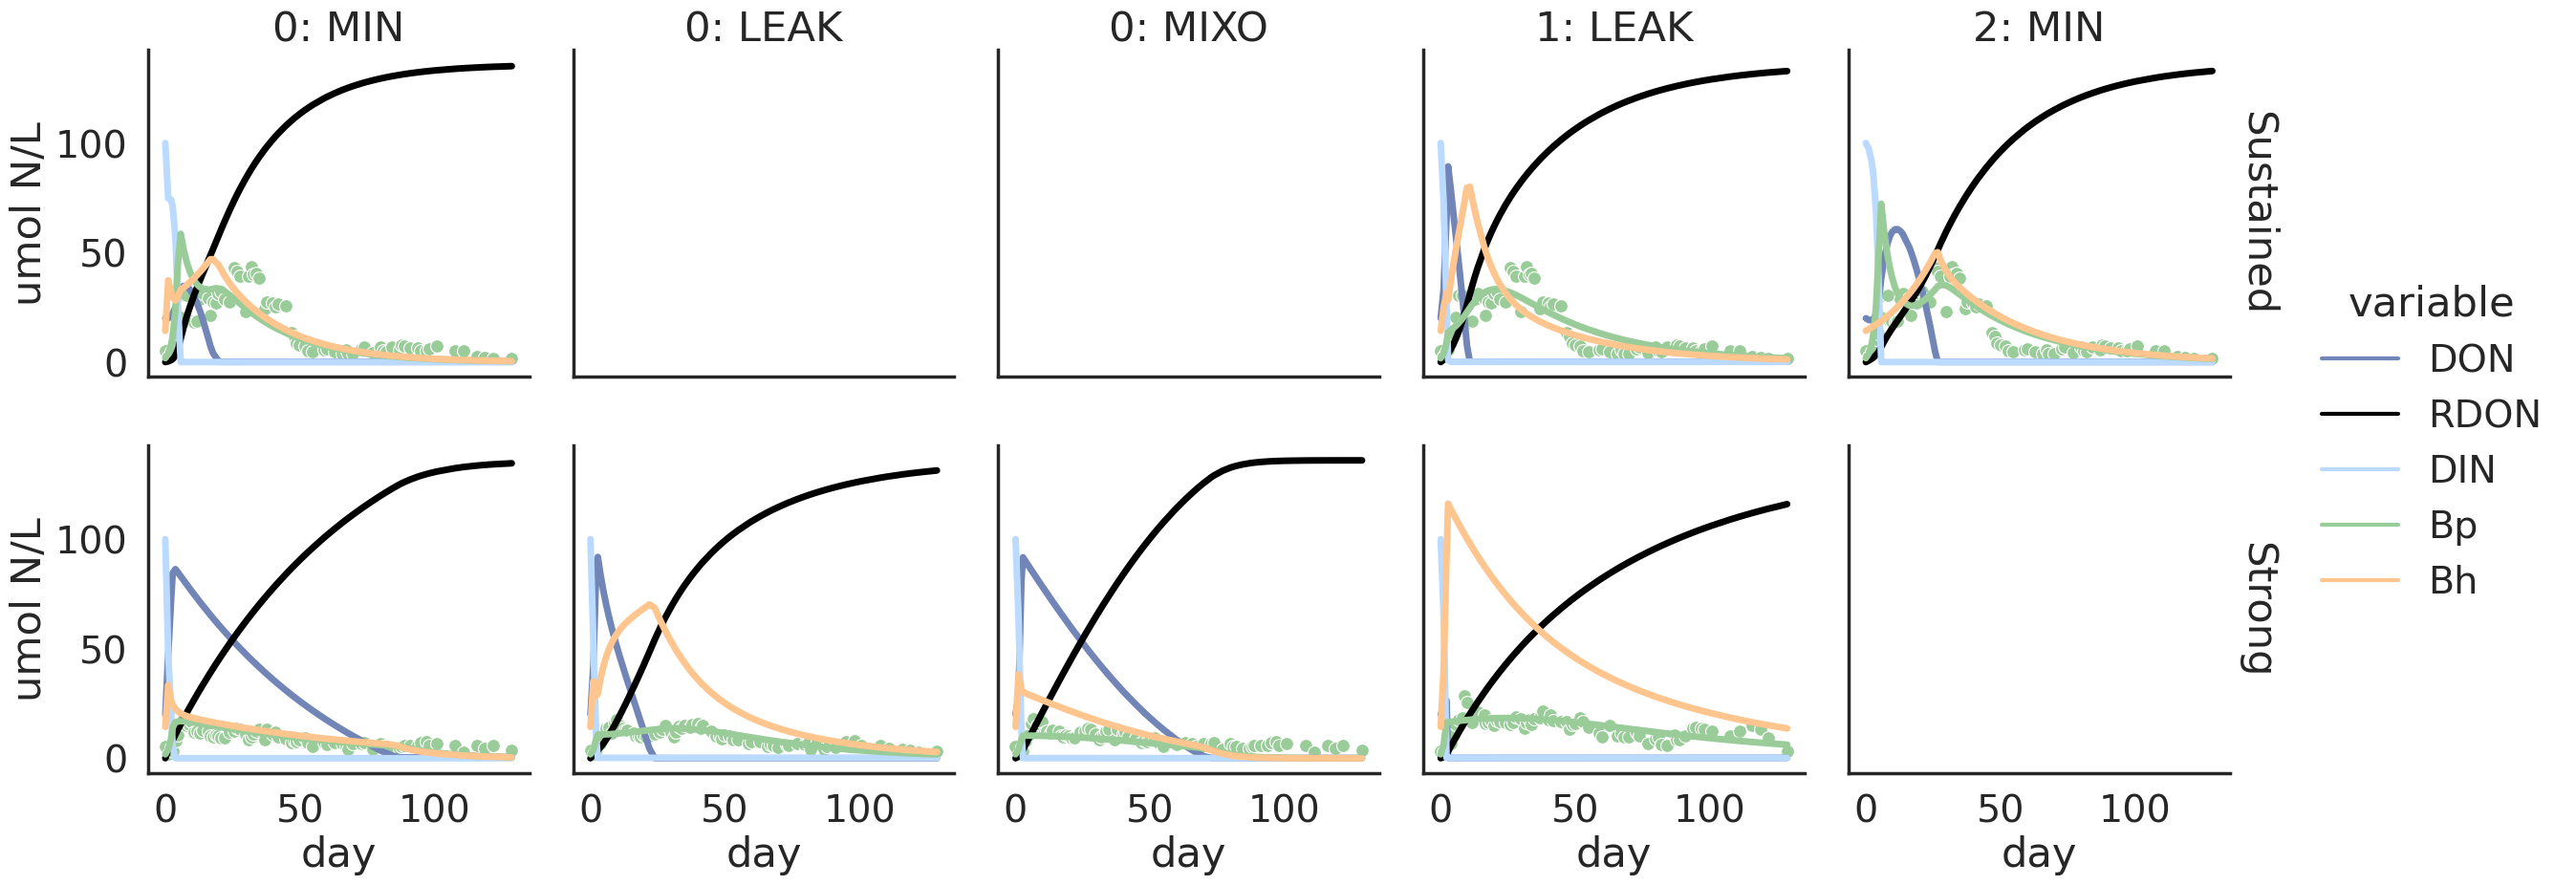

In [163]:
sns.set_context('poster', font_scale=1.3)
examplars_df['name'] = examplars_df['cluster'].astype(str) + ': '+ examplars_df['Model']
g = sns.relplot(
    data=examplars_df, 
    x='day', y='value',
    hue='variable', hue_order=ccnorder1, palette=ccnpalette1,
    #estimator=None, units='run_id',
    col='name', row='Group', col_order=idsorder,
    row_order=gorder[:-1],
    #col_wrap=4,
    kind='line', lw=5,
    facet_kws=dict(margin_titles=True)
    
)

for (group,n), ax in g.axes_dict.items():
    sample_id = examplars_df.loc[examplars_df.Group.isin([group]) & examplars_df.name.isin([n]),'Sample' ]
    sns.scatterplot(data=refdf.loc[refdf.Sample.isin(sample_id)], 
                    x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

#g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',row_template='{row_name}',)



In [160]:
examplars_df.name.unique()

array(['0: LEAK', '1: LEAK', '2: MIN', '0: MIXO', '0: MIN'], dtype=object)

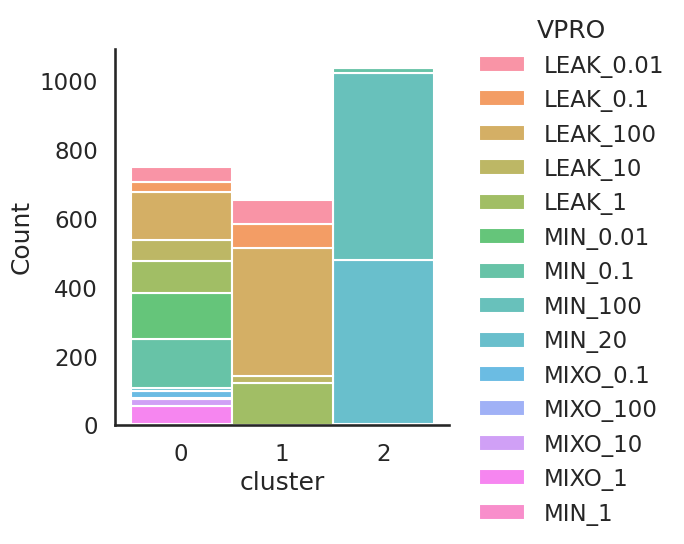

In [104]:
sns.displot(data=udf, x='cluster', hue='VPRO', discrete=True, multiple='stack')

In [105]:
udf.pivot_table(index='cluster', columns='Group_thrs', fill_value=0, aggfunc='count', values='Mode')

Group_thrs  Strong  Sustained
cluster                      
0              479        269
1               57        596
2                1       1040

In [106]:
[len(i) for i in clusterer.exemplars_]

In [107]:
exemplar_dict =  {
    cid : np.concatenate([np.where((i == clusterable_embedding).all(axis=1))[0] for i in c_exemplars]) 
  for cid, c_exemplars in enumerate(clusterer.exemplars_)
}
    
        #print (i)
        

In [108]:
exemplar_array = np.full_like(clusterer.labels_, fill_value=-10)
for k,v in exemplar_dict.items():
    exemplar_array[v] = k
#zero[indices] = 42
exemplar_array
udf['exemplar'] = exemplar_array
udf.loc[udf['exemplar'].isin([-10]), 'exemplar'] = np.NaN

In [109]:
udf['exemplar']

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2437    0.0
2438    0.0
2439    0.0
2440    0.0
2441    0.0
Name: exemplar, Length: 2442, dtype: float64

In [116]:
udf[['cluster', 'exemplar']].value_counts()

cluster  exemplar
0        0.0         748
2        2.0         730
1        1.0         608
dtype: int64

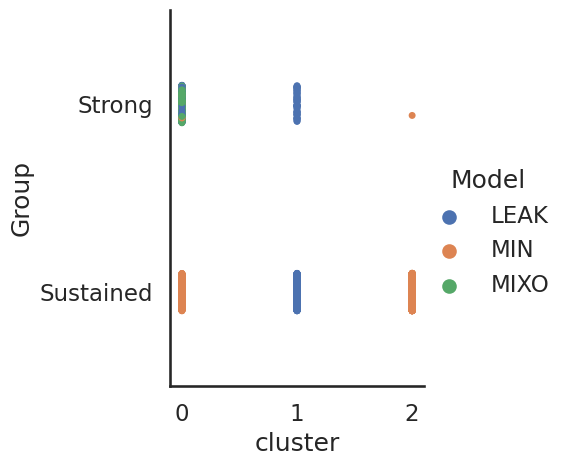

In [111]:
sns.catplot(
    data=udf,
    x='cluster',
    y='Group',
    hue='Model'
)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

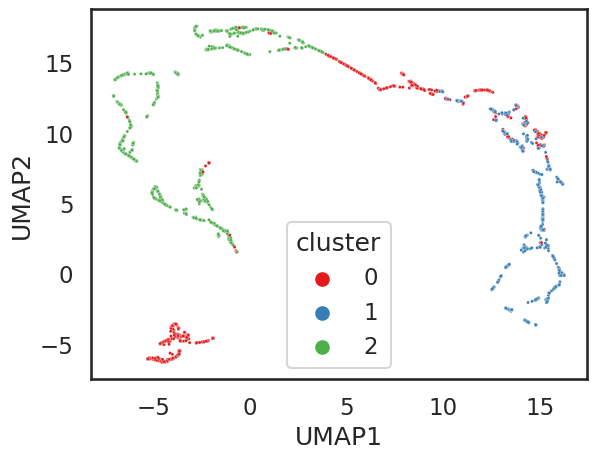

In [114]:
clustered = (labels >= 0)
sns.scatterplot(
    data=udf.loc[clustered],
    x='UMAP1', y='UMAP2',
    hue='cluster',
    s=5,
    palette='Set1');
sns.scatterplot(
    data=udf.loc[~clustered],
    x='UMAP1', y='UMAP2',
            color=(0.5, 0.5, 0.5),
            s=5,
            #alpha=0.5
)


In [115]:
udf.pivot_table(index='cluster', columns='Group', fill_value=0, aggfunc='count', values='Mode')

Group    Strong  Sustained
cluster                   
0           479        269
1            57        596
2             1       1040

In [485]:
udf.pivot_table(index='exemplar', columns='Group', fill_value=0, aggfunc='count', values='Mode')

Group     Inhibited  Strong  Sustained
exemplar                              
0.0             827       0        256
1.0             751       2          0
2.0               6     132        443
3.0              11      28        511
4.0             300       3        220
5.0             499       0          1
6.0            1205       0          0
7.0            1434       9          8
8.0             500       0          0
9.0            1057       0          0

In [486]:
udf.pivot_table(index='exemplar', columns='Group_thrs', fill_value=0, aggfunc='count', values='Mode')

Group_thrs  Inhibited  None  Strong  Sustained
exemplar                                      
0.0               474   609       0          0
1.0               612   141       0          0
2.0                 4   337     127        113
3.0                 2   524      24          0
4.0                87   432       2          2
5.0               480    20       0          0
6.0              1205     0       0          0
7.0              1421    27       3          0
8.0               500     0       0          0
9.0              1055     2       0          0

In [422]:
ccnpalette

['#7285b7', 'black', '#bbdaff', '#326232', '#ffa98f', '#99cc99', '#ffc58f']

In [423]:
ccnorder1= ['DON', 'RDON', 'DIN', 'Bp', 'Bh']
ccnpalette1 = [ccnpalette[0], ccnpalette[1], ccnpalette[2], ccnpalette[5], ccnpalette[6], ]

In [424]:
ccnpalette1

['#7285b7', 'black', '#bbdaff', '#99cc99', '#ffc58f']

/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=atdf,
/tmp/ipykernel_1455542/2016111591.py:33:

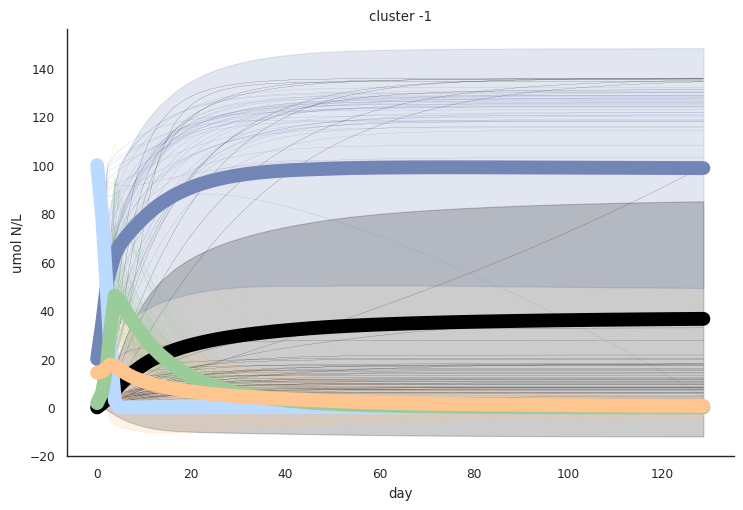

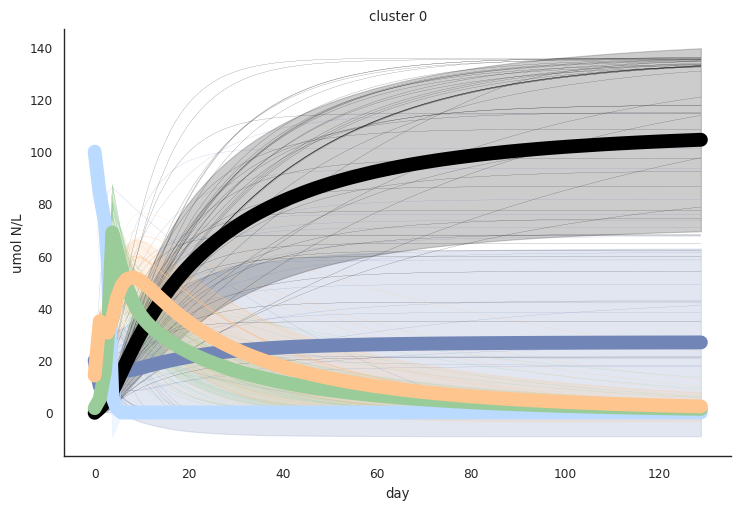

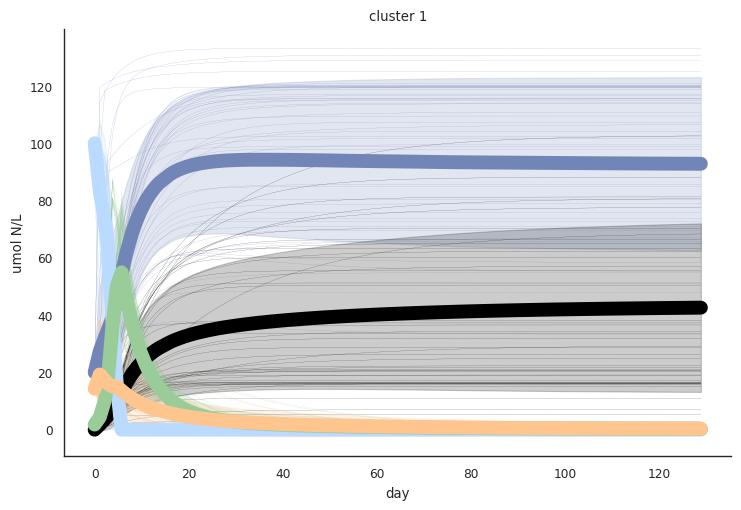

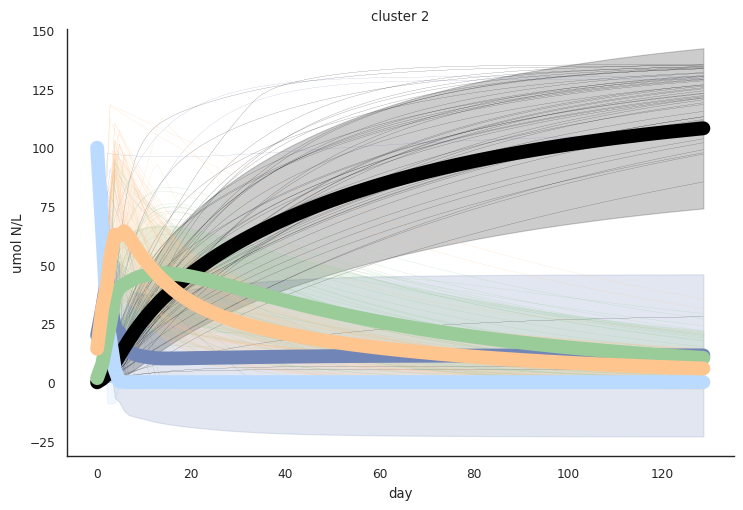

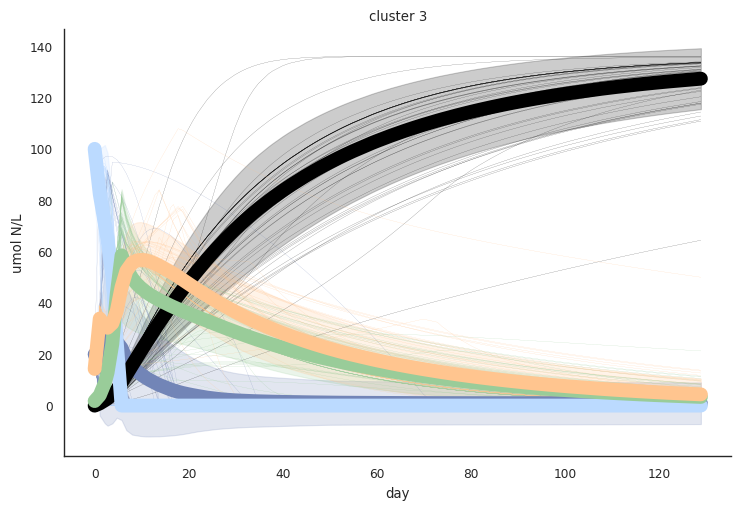

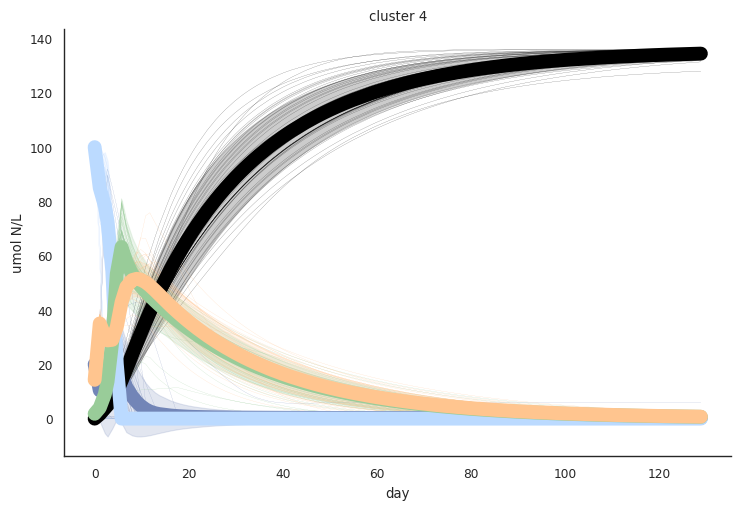

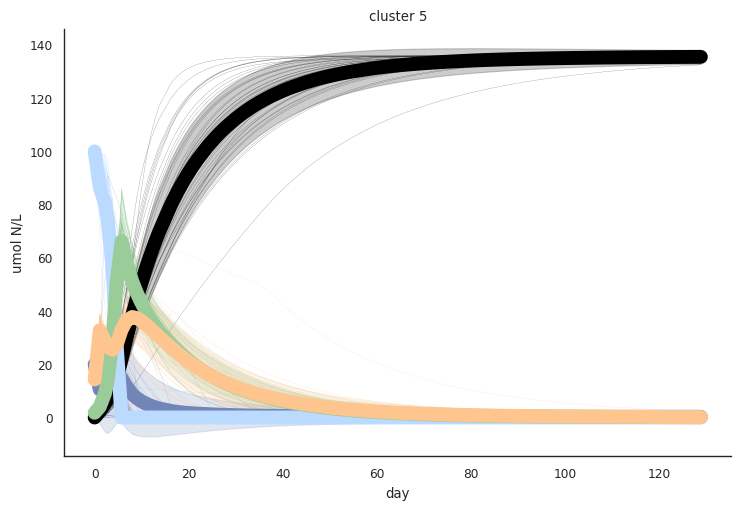

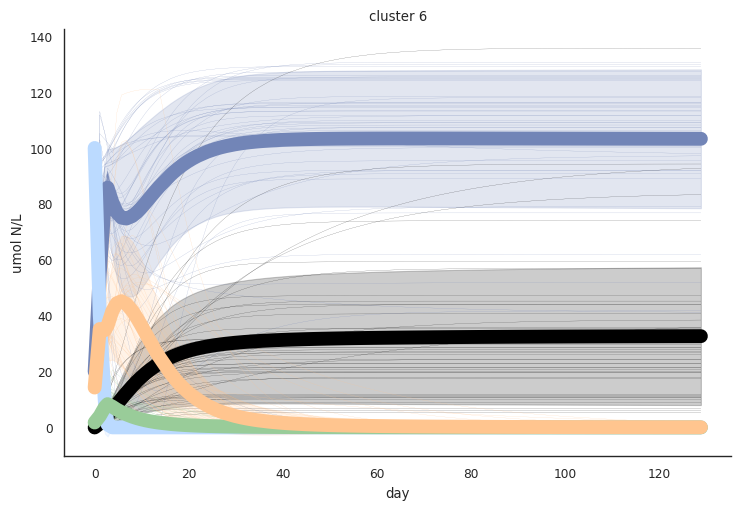

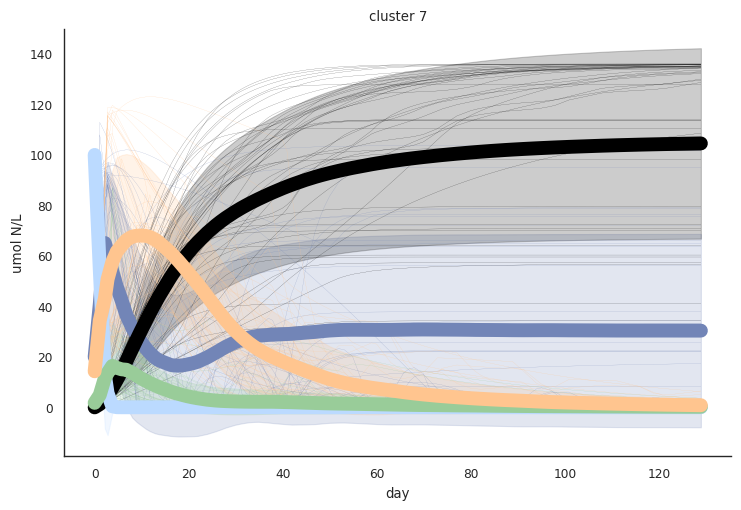

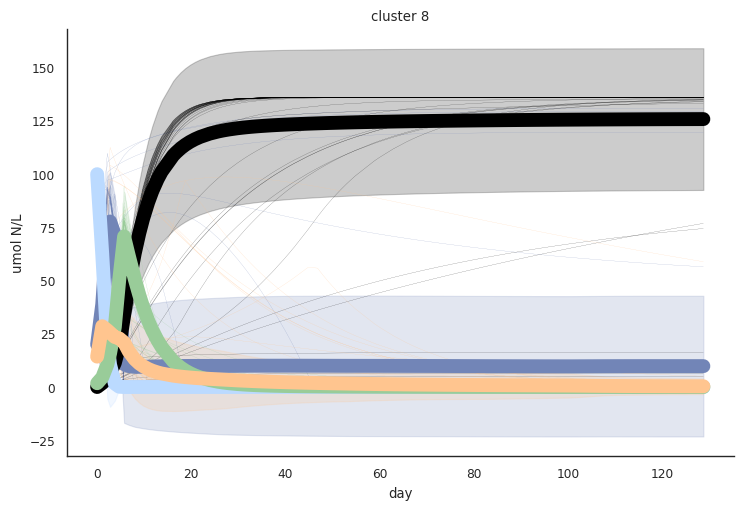

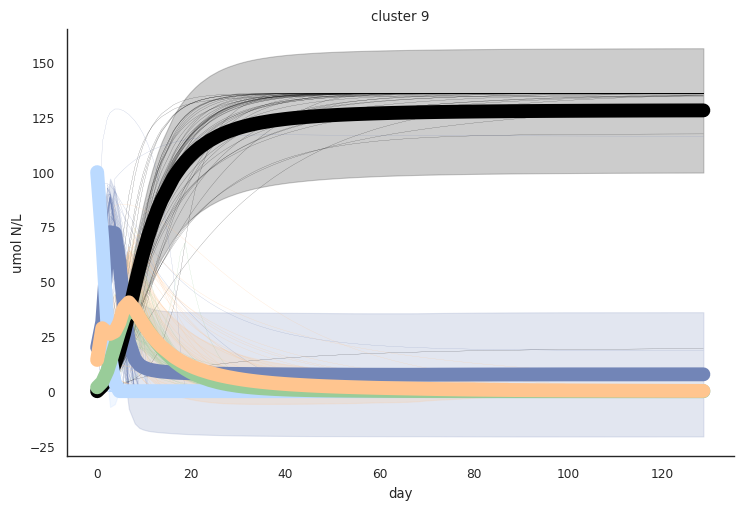

In [425]:
#mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
#mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster.unique()):
    #cluster_udf = udf.loc[udf.cluster.isin([i]) & udf.Group_thrs.isin(['Strong', 'Sustained'])]
    cluster_udf = udf.loc[udf.cluster.isin([i])] 
    if cluster_udf.shape[0] < 5:
        next
    if cluster_udf.shape[0] > 60:
        ids = list(cluster_udf['run_id'].sample(50))
    else:
        ids = cluster_udf['run_id']
    all_ids = cluster_udf['run_id']
    tdf = mdf.loc[mdf.variable.isin(ccnorder1) & mdf.run_id.isin(ids)]
    atdf = mdf.loc[mdf.variable.isin(ccnorder1) & mdf.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='day', y='value',
        hue='variable', hue_order=ccnorder1, palette=ccnpalette1,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.1,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='day', y='value',
        hue='variable', hue_order=ccnorder1, palette=ccnpalette1, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


<Axes: ylabel='$\\lambda$ value'>

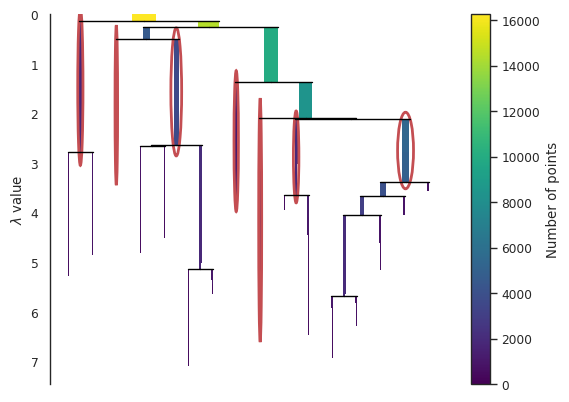

In [328]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette='Fire')

In [383]:
clusterer.exemplars_

[array([[-0.267562  ,  1.12650239,  0.18690842, ...,  7.48128605,
          4.46168613,  2.79031157],
        [-0.35659271,  1.12746358,  0.09353489, ...,  8.141819  ,
          3.8931303 ,  2.83933091],
        [-0.27440006,  1.12873626,  0.18248384, ...,  7.52127981,
          4.4317379 ,  2.80507994],
        ...,
        [-0.28949443,  1.13558805,  0.21817774, ...,  7.38267469,
          4.64472675,  2.8424294 ],
        [-0.27158001,  1.12769246,  0.20796129, ...,  7.39664459,
          4.56318283,  2.78673244],
        [-0.27403715,  1.12941432,  0.20791805, ...,  7.40348339,
          4.56681776,  2.79527855]]),
 array([[-0.22463728,  1.20142877, -0.05820673, ...,  6.01402044,
          6.1631732 ,  3.6343081 ],
        [-0.26042151,  0.99286205, -0.05128103, ...,  5.97263908,
          6.08361006,  3.61318946],
        [-0.28098169,  0.94385642, -0.04926388, ...,  5.92047691,
          6.15692043,  3.6220367 ],
        ...,
        [ 0.13374588,  0.32696012, -0.51644397, ...,  

5.0


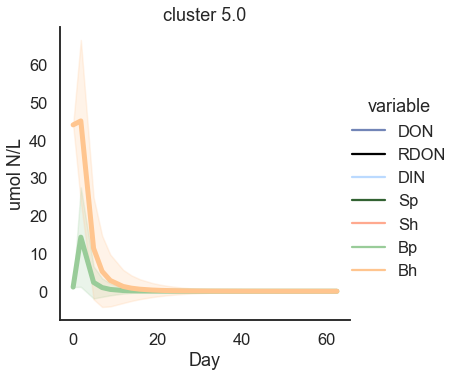

7.0


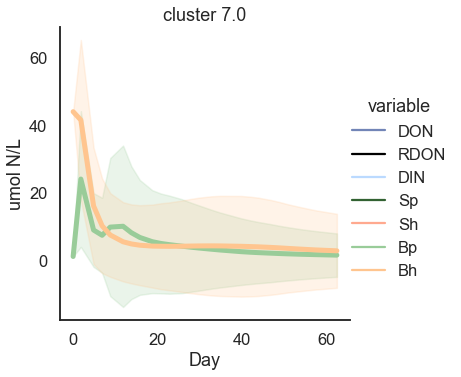

10.0


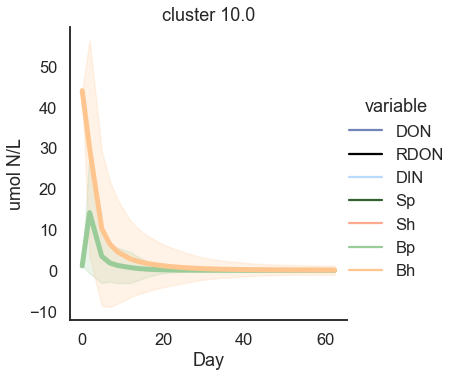

3.0


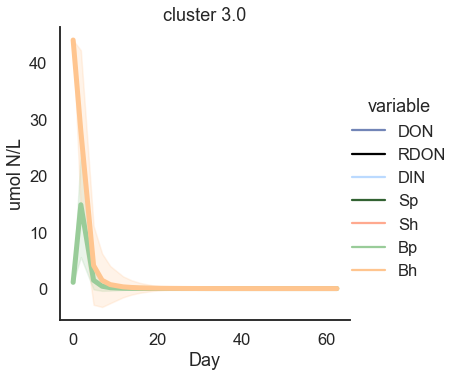

zero


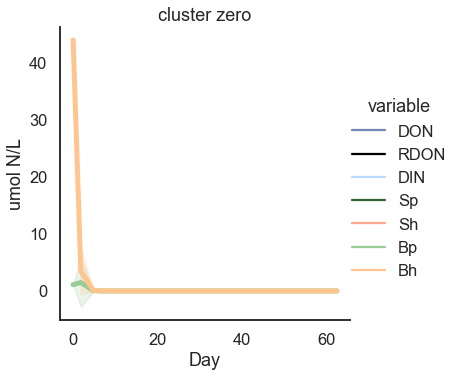

2.0


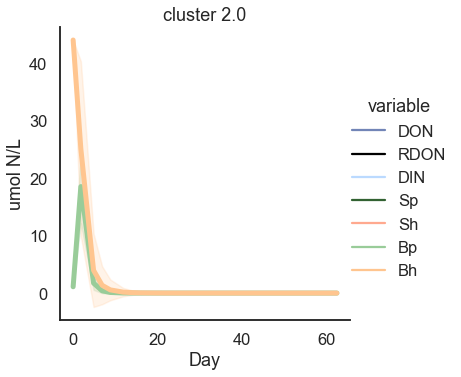

6.0


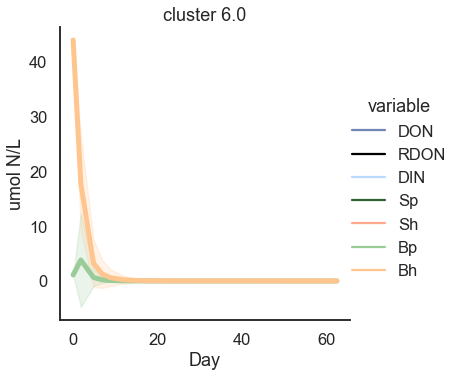

negative


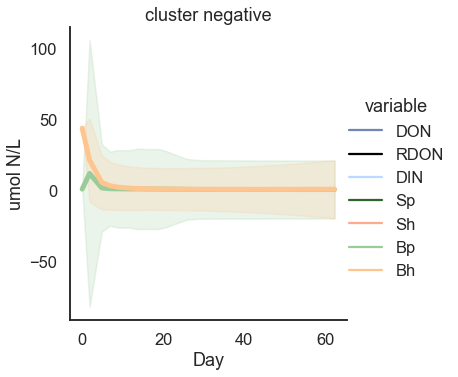

8.0


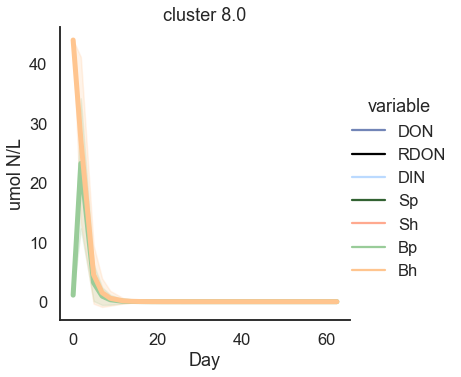

4.0


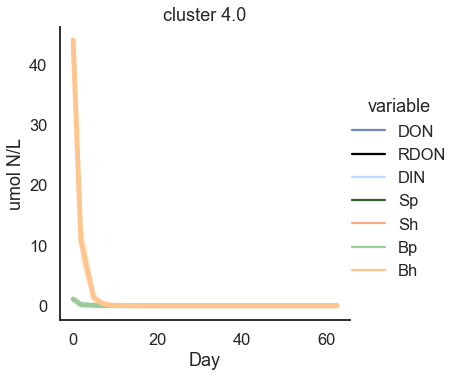

0.0


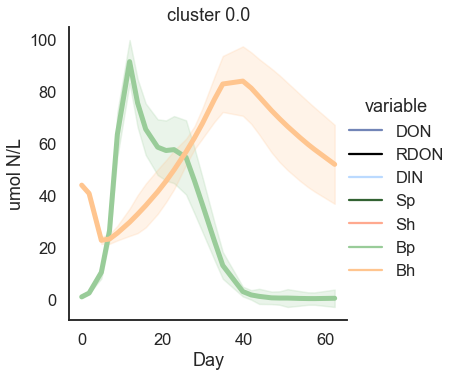

1.0


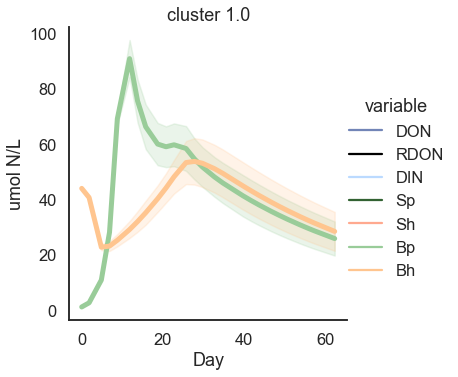

9.0


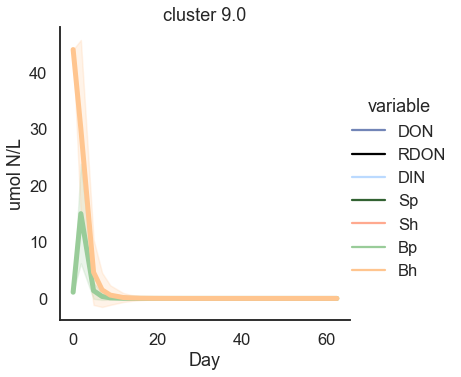

In [151]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in (sum_df2.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(sum_df2.loc[sum_df2.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(['Bp', 'Bh']) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


0


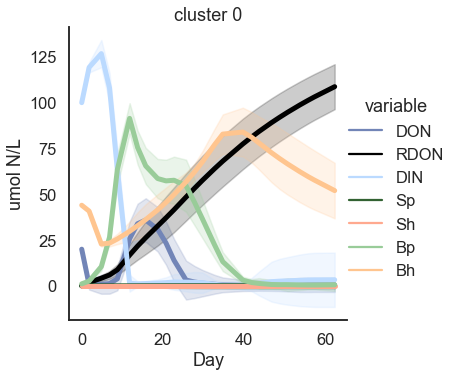

1


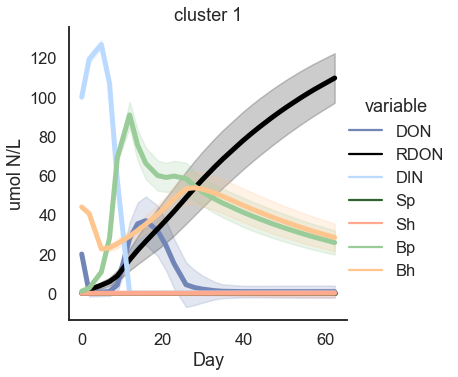

2


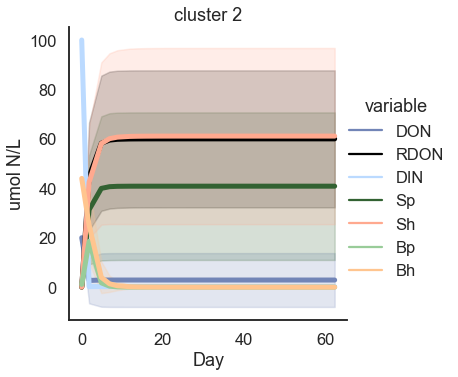

3


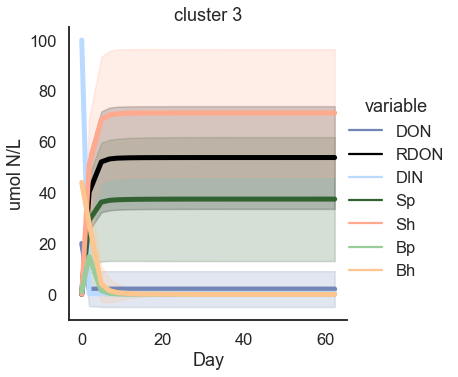

4


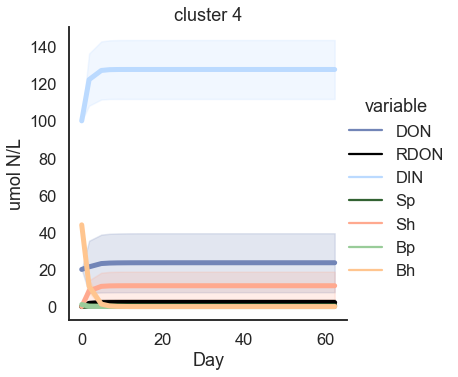

5


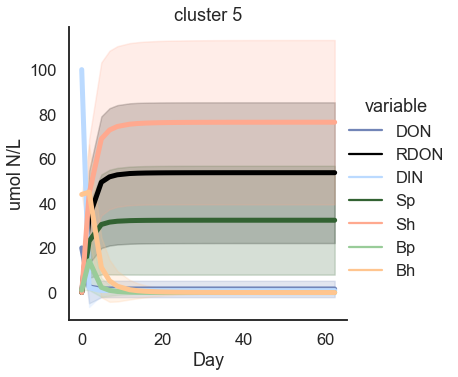

6


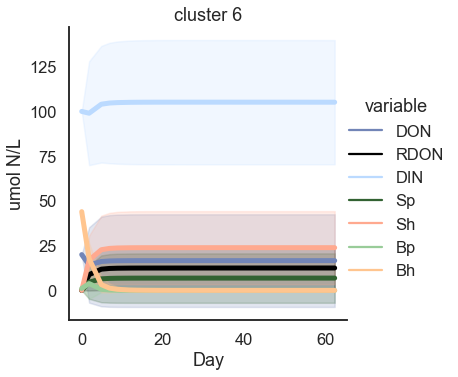

7


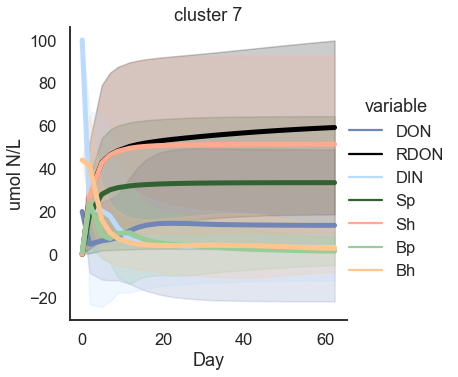

8


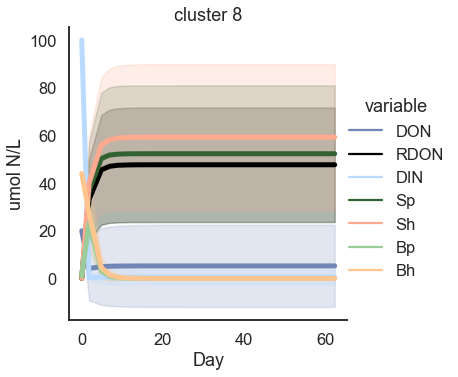

9


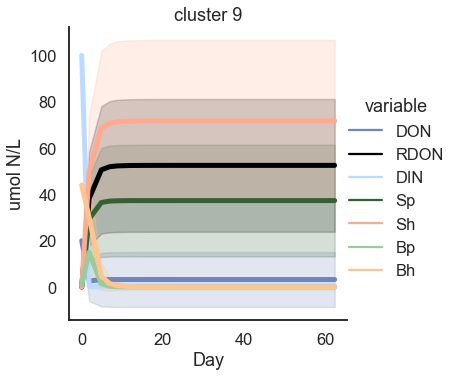

10


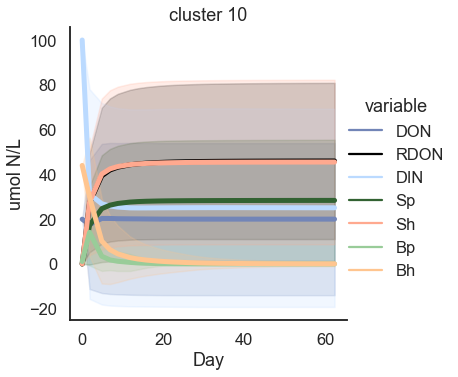

In [152]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


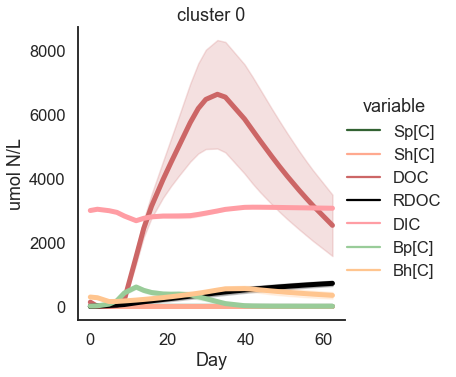

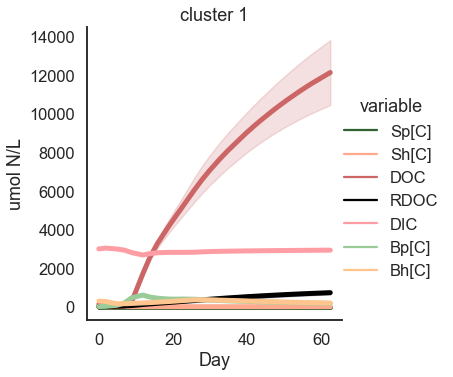

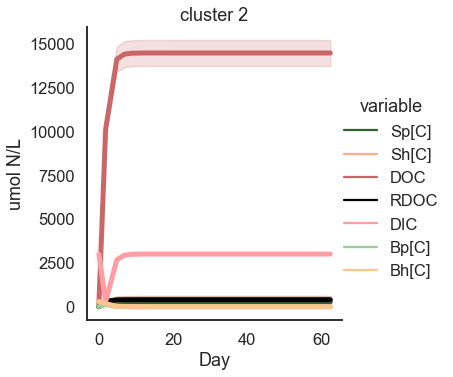

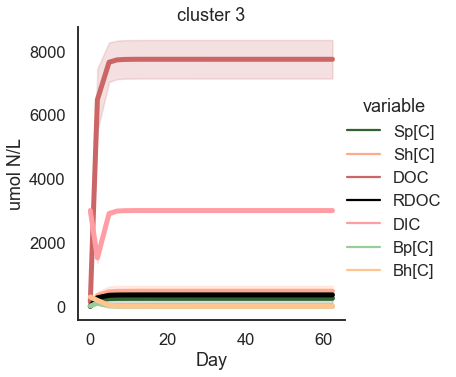

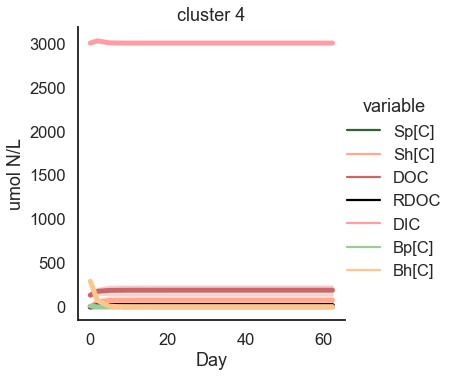

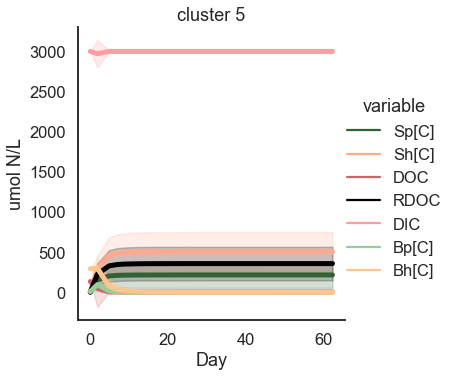

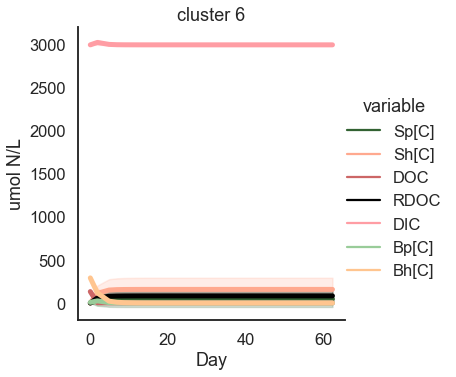

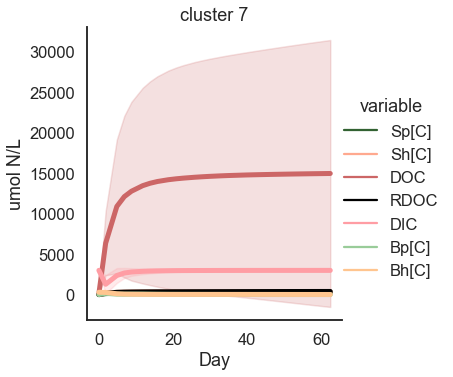

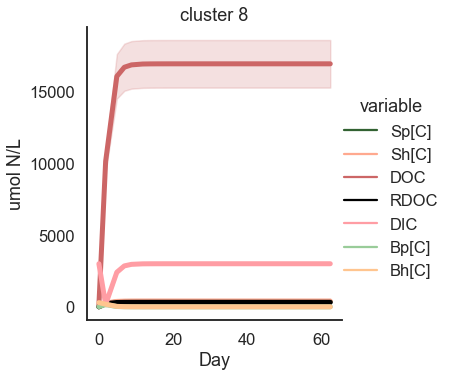

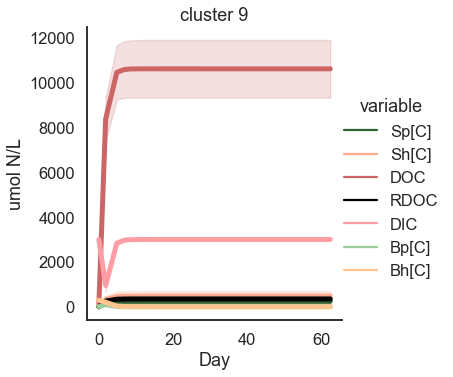

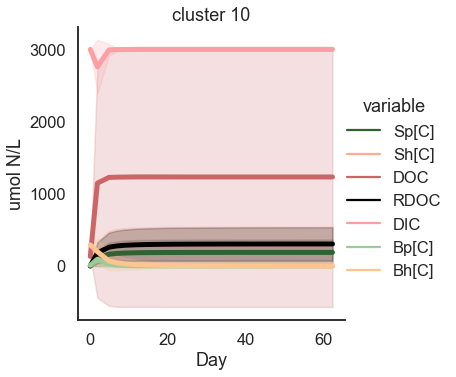

In [153]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    #ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=cccorder, palette=cccpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


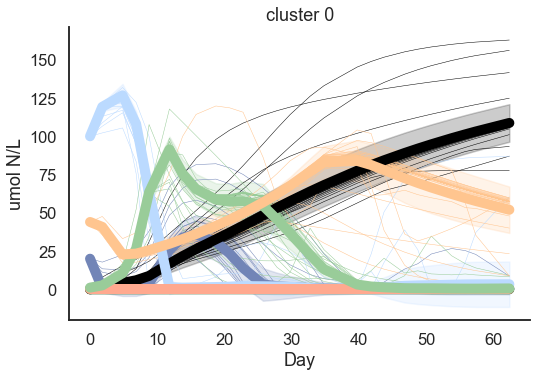

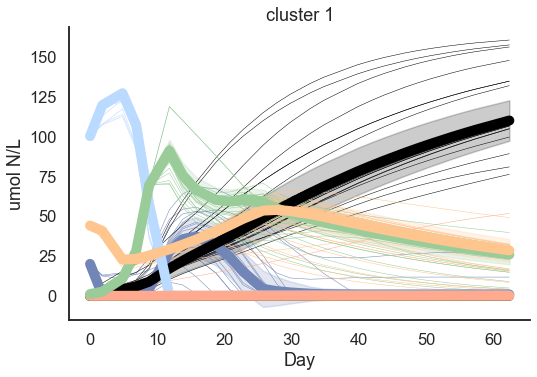

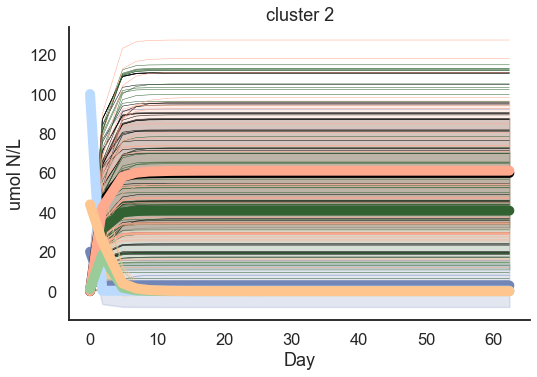

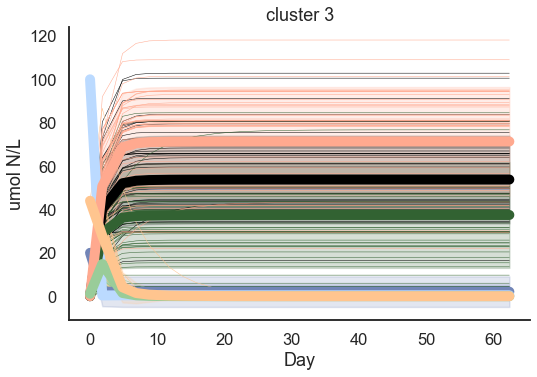

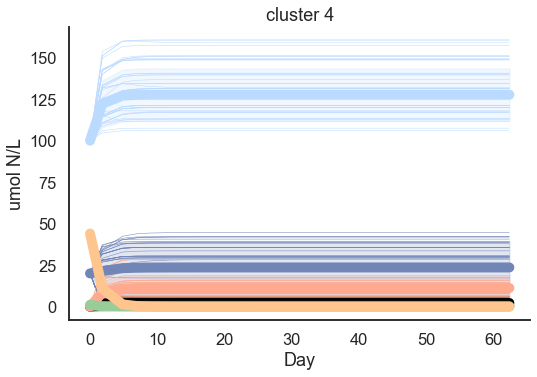

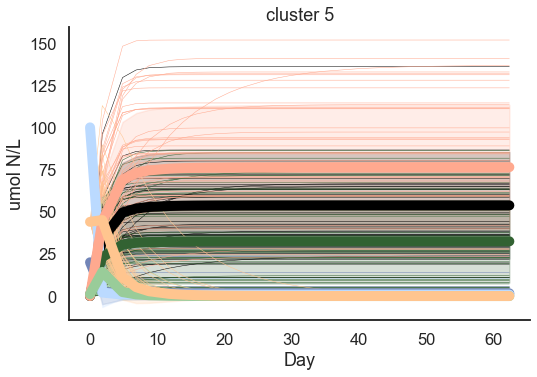

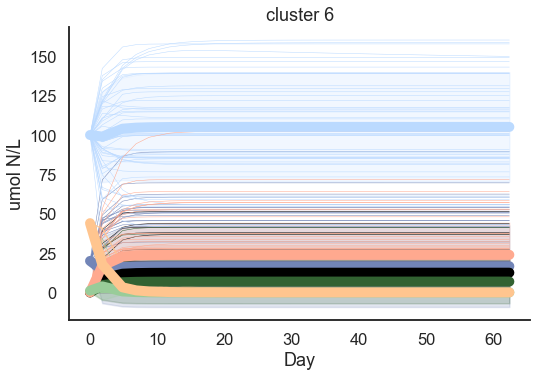

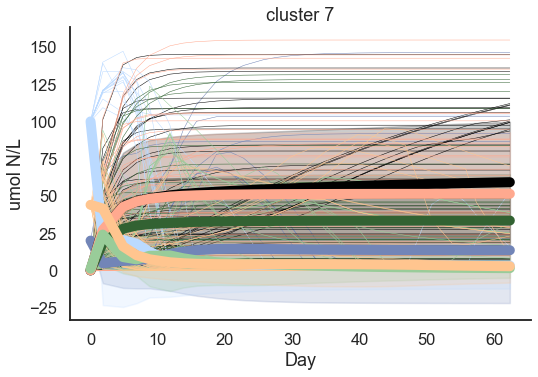

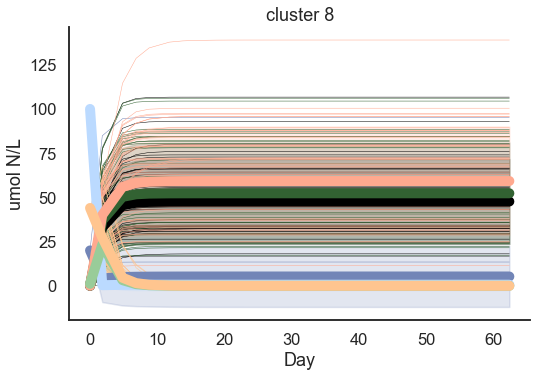

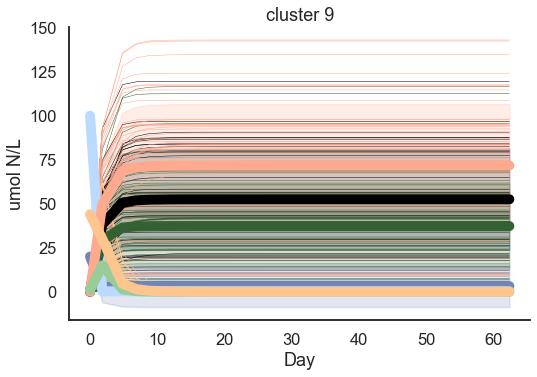

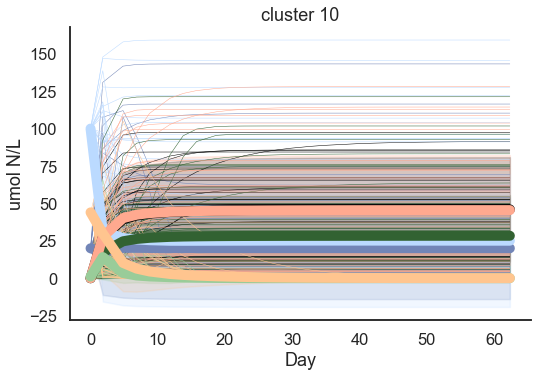

In [154]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


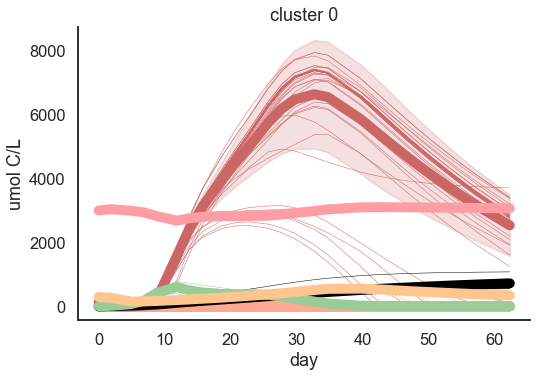

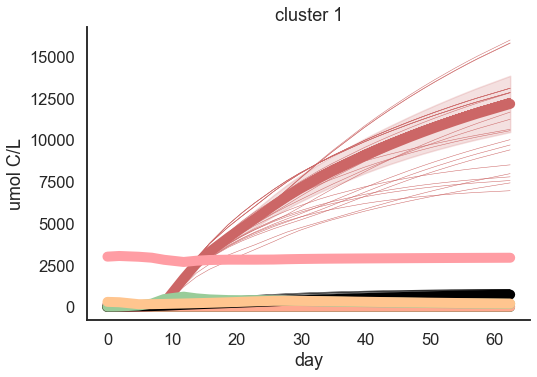

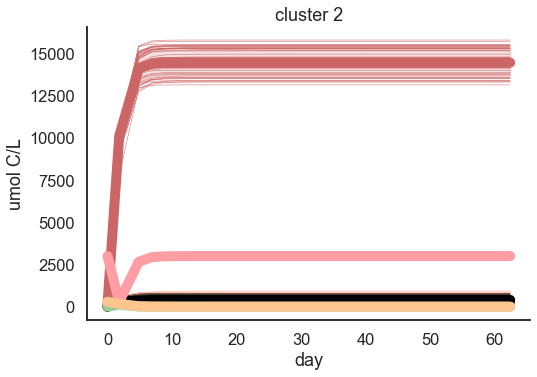

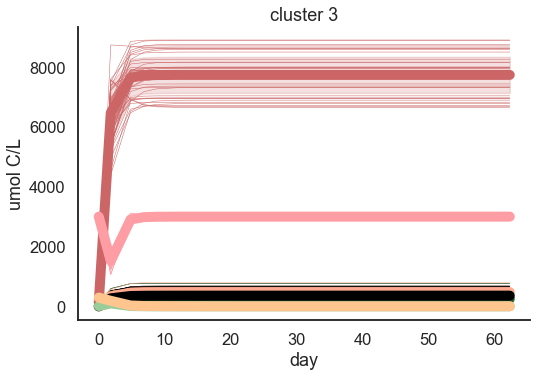

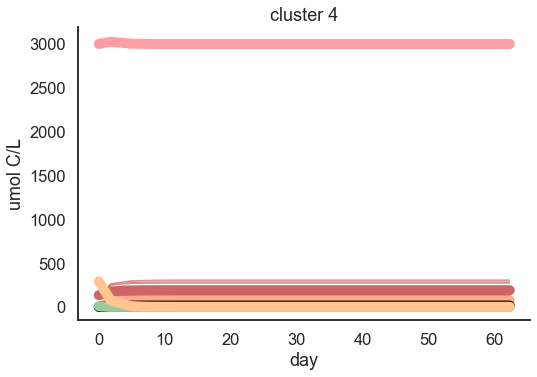

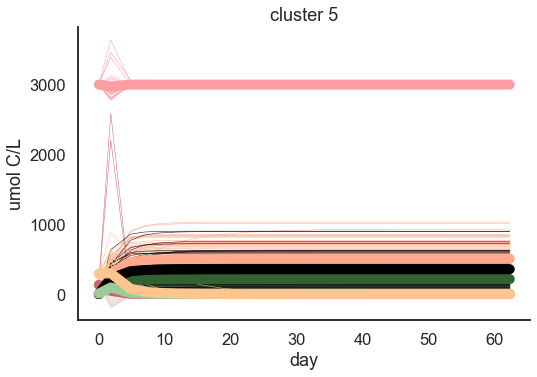

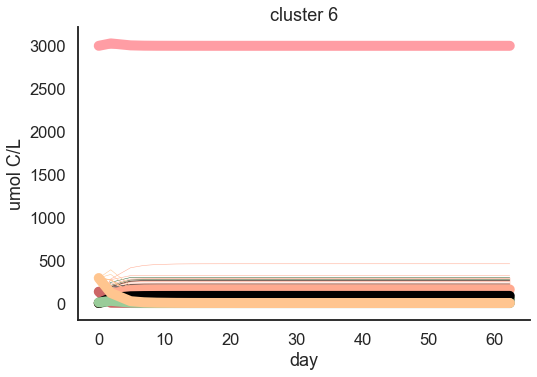

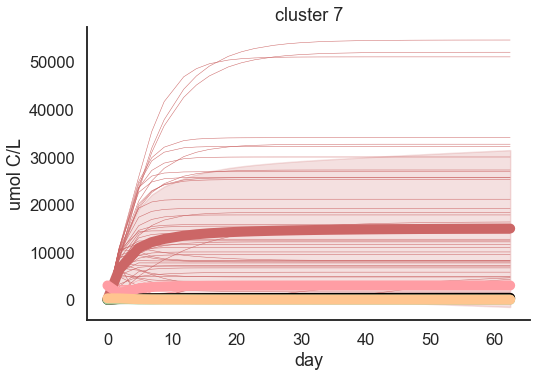

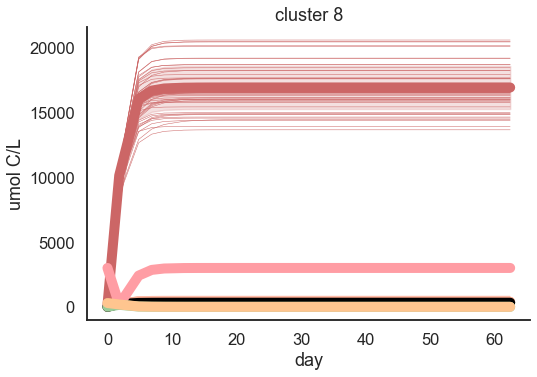

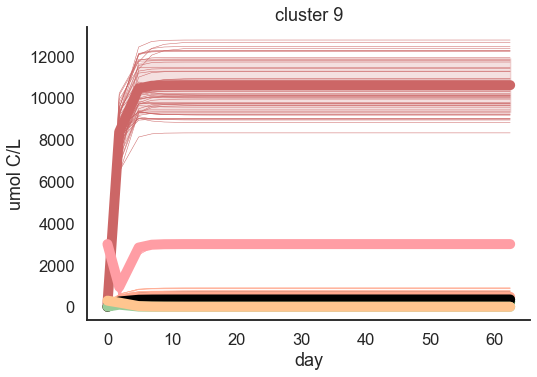

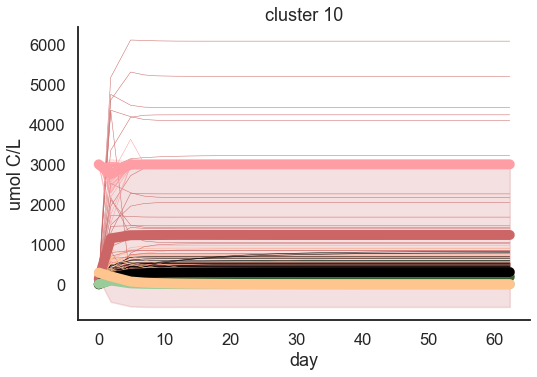

In [155]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [156]:
udf.head()

UMAP1      UMAP2                     run_id  Unnamed: 0           M_h  \
0  -4.203127  17.046898  de3_h-1073436347008145156           0  6.542767e-07   
1  -8.958201  12.223330  de3_h-1659825646723300236           0  9.715511e-06   
2  20.315327   9.566874  de3_h-1765083009615901515           0  1.008276e-05   
3  -4.633354  15.106026  de3_h-2171644033102072858           0  1.143038e-05   
4   3.143292   4.256141  de3_h-3012145983443439829           0  1.106115e-05   

        M_p  gamma^D_p  gamma^D_h    R_p    R_h  ...        p_err  \
0  0.000011   0.298158   0.229257  6.625  6.625  ...  1603.049991   
1  0.000002   0.620677   0.419616  6.625  6.625  ...  1606.113574   
2  0.000004   0.631468   0.491229  6.625  6.625  ...  1604.830136   
3  0.000010   0.842866   0.587069  6.625  6.625  ...  1604.574999   
4  0.000002   0.955503   0.805939  6.625  6.625  ...  1643.328802   

         error  logerror  message  type  max_nonzero_day  negative   zero  \
0  5589.574743  8.628658      NaN   de3        11.803472     False  False   
1  5612.515391  8.632754      NaN   de3         8.779167     False  False   
2  5634.977794  8.636748      NaN   de3         6.853472     False  False   
3  5594.669588  8.629570      NaN   de3        11.803472     False  False   
4  5651.208692  8.639625      NaN   de3        11.803472     False  False   

   cluster  cluster2  
0       -1         8  
1       -1         7  
2        6         6  
3       -1         7  
4       -1        10  

[5 rows x 59 columns]

In [157]:
Xh.columns

MultiIndex([('value', 'Bp',  5.0),
            ('value', 'Bp', 12.0),
            ('value', 'Bp', 16.0),
            ('value', 'Bp', 19.0),
            ('value', 'Bp', 42.0),
            ('value', 'Bp', 62.0),
            ('value', 'Bh',  5.0),
            ('value', 'Bh', 12.0),
            ('value', 'Bh', 16.0),
            ('value', 'Bh', 19.0),
            ('value', 'Bh', 42.0),
            ('value', 'Bh', 62.0)],
           names=[None, 'variable', 'day0'])

In [ ]:
udf['Bp@42'] = udf['run_id'].map(Xh[('value', 'Bp', 42.0)])
udf['Bh@42'] = udf['run_id'].map(Xh[('value', 'Bh', 42.0)])


In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=3, kind='ecdf')

In [ ]:

mdf2 = pd.merge(mdf2, udf[['run_id', 'cluster', 'cluster2']], on='run_id', )

In [ ]:

sns.displot(data=mdf2.loc[mdf2.Day.round(0).isin(sample_days) & mdf2.variable.isin(['Bp', 'Bh'])], 
            x='value', col='Day', palette='Set2', row='variable',
            aspect=1,
            kind='ecdf', hue='cluster2'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=1,
            kind='ecdf', col='cluster'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='error', hue='cluster2', palette='fire', 
            aspect=3, kind='ecdf')

In [ ]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

In [ ]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

In [ ]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

In [158]:
sum_df2.to_csv('cluster_assignment.csv.gz')